# **INTRODUCTION**

This project will do clustering for airline passenger segmentation using K-Means.

# **ABOUT DATASET**

Here is a detailed information about each feature in the dataset.




| **Column Name**       | **Description**                                        |
|-------------------------|--------------------------------------------------------|
| `MEMBER_NO`            | Member ID                                              |
| `FFP_DATE`             | Frequent flyer program join date                      |
| `FIRST_FLIGHT_DATE`    | First flight date                                     |
| `GENDER`               | Gender                                                |
| `FFP_TIER`             | Membership class                                      |
| `WORK_CITY`            | City of origin                                        |
| `WORK_PROVINCE`        | Province of origin                                    |
| `WORK_COUNTRY`         | Country of origin                                     |
| `AGE`                  | Customer's age                                        |
| `LOAD_TIME`            | Data collection date                                 |
| `FLIGHT_COUNT`         | Number of flights                                     |
| `BP_SUM`               | Planned trips                                         |
| `SUM_YR_1`             | Total credits/points in the first year               |
| `SUM_YR_2`             | Total credits/points in the second year              |
| `SEG_KM_SUM`           | Total flight distances for finished trips (km)       |
| `LAST_FLIGHT_DATE`     | Last flight date                                      |
| `LAST_TO_END`          | Time from last flight to observation window end      |
| `AVG_INTERVAL`         | Average time interval between flights                |
| `MAX_INTERVAL`         | Maximum time interval between flights in observation window |
| `EXCHANGE_COUNT`       | Number of points exchanges                           |
| `avg_discount`         | Average discount rate                                |
| `Points_Sum`           | Total cumulative points                              |
| `Point_NotFlight`      | Number of non-flight point changes                   |


# **IMPORT LIBRARY**

In [ ]:
# import necessary libraries
# data preprocessing libraries
import pandas as pd
import numpy as np

from datetime import datetime

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for model building
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# **LOAD DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/Dataset/flight.csv')

# check the first 5 rows
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

# **DATA UNDERSTANDING**

In [ ]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Observations :**
1. Dataset contains 62,988 rows and 23 columns
2. There are some missing values found in columns `WORK_CITY`, `WORK_PROVINCE`, `GENDER`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, `SUM_YR_2`
3. `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` were stored in object datatypes instead of datetime. Data types of these columns will be converted



In [ ]:
date_columns = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

# convert data types
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

# recheck dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [ ]:
# check unique values in each column
for col in df.columns :
  print(f'Unique values in {col} : ')
  print(df[col].unique())

Unique values in MEMBER_NO : 
[54993 28065 55106 ... 45690 61027 61340]
Unique values in FFP_DATE : 
<DatetimeArray>
['2006-11-02 00:00:00', '2007-02-19 00:00:00', '2007-02-01 00:00:00',
 '2008-08-22 00:00:00', '2009-04-10 00:00:00', '2008-02-10 00:00:00',
 '2006-03-22 00:00:00', '2010-04-09 00:00:00', '2011-06-07 00:00:00',
 '2010-07-05 00:00:00',
 ...
 '2006-02-05 00:00:00', '2010-01-23 00:00:00', '2004-12-05 00:00:00',
 '2009-05-11 00:00:00', '2004-12-11 00:00:00', '2004-12-27 00:00:00',
 '2004-11-15 00:00:00', '2009-05-03 00:00:00', '2010-01-25 00:00:00',
 '2009-05-19 00:00:00']
Length: 3068, dtype: datetime64[ns]
Unique values in FIRST_FLIGHT_DATE : 
<DatetimeArray>
['2008-12-24 00:00:00', '2007-08-03 00:00:00', '2007-08-30 00:00:00',
 '2008-08-23 00:00:00', '2009-04-15 00:00:00', '2009-09-29 00:00:00',
 '2006-03-29 00:00:00', '2010-04-09 00:00:00', '2011-07-01 00:00:00',
 '2010-07-05 00:00:00',
 ...
 '2014-02-20 00:00:00', '2014-03-23 00:00:00', '2014-03-09 00:00:00',
 '2013-12-1

**Observations :**
1. It seems that naming format is already standardized in most columns except for `WORK_CITY` and `WORK_PROVINCE`
2. `WORK_COUNTRY` has country code which is difficult to interpret for people if they don't know
2. Missing values are not represented in values like -1, -999, etc

In [ ]:
# lowercase all values in columns 'WORK_CITY' and 'WORK_PROVINCE'
df['WORK_CITY'] = df['WORK_CITY'].str.lower()
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].str.lower()

In [ ]:
country_dict = {
    'CN': 'China',
    'US': 'United States',
    'FR': 'France',
    'AN': 'Netherlands Antilles',
    'JP': 'Japan',
    'HK': 'Hong Kong',
    'MY': 'Malaysia',
    'AU': 'Australia',
    'NL': 'Netherlands',
    'MX': 'Mexico',
    'CA': 'Canada',
    'KR': 'South Korea',
    'PK': 'Pakistan',
    'TH': 'Thailand',
    'SG': 'Singapore',
    'BR': 'Brazil',
    'PE': 'Peru',
    'AE': 'United Arab Emirates',
    'HN': 'Honduras',
    'PH': 'Philippines',
    'ID': 'Indonesia',
    'MO': 'Macau',
    'GN': 'Guinea',
    'FL': 'France',
    'KH': 'Cambodia',
    'nan': None,
    'TW': 'Taiwan',
    'VN': 'Vietnam',
    'DE': 'Germany',
    'IL': 'Israel',
    'CH': 'Switzerland',
    'PA': 'Panama',
    'VT': 'Vietnam',
    'EC': 'Ecuador',
    'NG': 'Nigeria',
    'BI': 'Burundi',
    'GT': 'Guatemala',
    'BE': 'Belgium',
    'GL': 'Greenland',
    'NZ': 'New Zealand',
    'NI': 'Nicaragua',
    'KO': 'Kosovo',
    'CC': 'Cocos Islands',
    'MN': 'Mongolia',
    'UK': 'United Kingdom',
    'AS': 'American Samoa',
    'IT': 'Italy',
    'OM': 'Oman',
    'SE': 'Sweden',
    'BZ': 'Belize',
    'IN': 'India',
    'KZ': 'Kazakhstan',
    'PT': 'Portugal',
    'NO': 'Norway',
    'MS': 'Montserrat',
    'FI': 'Finland',
    'UZ': 'Uzbekistan',
    'NE': 'Niger',
    'AT': 'Austria',
    'AA': 'Saudi Arabia',
    'HU': 'Hungary',
    'CY': 'Cyprus',
    'EG': 'Egypt',
    'MA': 'Morocco',
    '中': 'China',
    'ES': 'Spain',
    'MZ': 'Mozambique',
    'IR': 'Iran',
    'SW': 'Swaziland (Eswatini)',
    'RE': 'France', # actuallly it's réunion, but this area is a part of mainland France
    'PS': 'Palestine',
    'KE': 'Kenya',
    'SN': 'Senegal',
    'BB': 'Barbados',
    'AZ': 'Azerbaijan',
    'UA': 'Ukraine',
    'LB': 'Lebanon',
    'YE': 'Yemen',
    'GE': 'Georgia',
    'SI': 'Slovenia',
    'MV': 'Maldives',
    'RO': 'Romania',
    'ZA': 'South Africa',
    'DK': 'Denmark',
    'AB': 'Azerbaijan',
    'CD': 'Congo',
    'UY': 'Uruguay',
    'CM': 'Cameroon',
    'TK': 'Tokelau',
    'AR': 'Argentina',
    'BN': 'Brunei',
    'PN': 'Pitcairn Islands',
    'BD': 'Bangladesh',
    '北': 'North Korea',
    'SU': 'Former Soviet Union',
    'RU': 'Russia',
    '沈': 'China',
    'GU': 'Guam',
    'GB': 'United Kingdom',
    'ZW': 'Zimbabwe',
    '芬': 'Finland',
    'FO': 'Faroe Islands',
    'IE': 'Ireland',
    'PR': 'Puerto Rico',
    'BS': 'Bahamas',
    'GH': 'Ghana',
    'SK': 'Slovakia',
    'IA': 'Italy',
    'cn': 'China',
    'TR': 'Turkey',
    'LA': 'Laos',
    'BG': 'Bulgaria',
    'CL': 'Chile',
    'CR': 'Costa Rica',
    'SA': 'Saudi Arabia'
}

# replace excisting values with value in dictionary
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].replace(country_dict)

# drop rows with unknown country codes
df = df[~df['WORK_COUNTRY'].isin(['FA', 'UV', 'KA', 'PP'])]

In [ ]:
# recheck
df['WORK_COUNTRY'].unique()

array(['China', 'United States', 'France', 'Netherlands Antilles',
       'Japan', 'Hong Kong', 'Malaysia', 'Australia', 'Netherlands',
       'Mexico', 'Canada', 'South Korea', 'Pakistan', 'Thailand',
       'Singapore', 'Brazil', 'Peru', 'United Arab Emirates', 'Honduras',
       'Philippines', 'Indonesia', 'Macau', 'Guinea', 'Cambodia', nan,
       'Taiwan', 'Vietnam', 'Germany', 'Israel', 'Switzerland', 'Panama',
       'Ecuador', 'Nigeria', 'Burundi', 'Guatemala', 'Belgium',
       'Greenland', 'New Zealand', 'Nicaragua', 'Kosovo', 'Cocos Islands',
       'Mongolia', 'United Kingdom', 'American Samoa', 'Italy', 'Oman',
       'Sweden', 'Belize', 'India', 'Kazakhstan', 'Portugal', 'Norway',
       'Montserrat', 'Finland', 'Uzbekistan', 'Niger', 'Austria',
       'Saudi Arabia', 'Hungary', 'Cyprus', 'Egypt', 'Morocco', 'Spain',
       'Mozambique', 'Iran', 'Swaziland (Eswatini)', 'Palestine', 'Kenya',
       'Senegal', 'Barbados', 'Azerbaijan', 'Ukraine', 'Lebanon', 'Yemen',
       

**Observation :** Some country codes are unknown even after checking it on the internet

# **DATA PREPROCESSING**

### **Check and Handle Missing Values**

In [ ]:
df.isna().sum() / len(df) * 100

MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602617
WORK_PROVINCE        5.157029
WORK_COUNTRY         0.041282
AGE                  0.666857
LOAD_TIME            0.000000
FLIGHT_COUNT         0.000000
BP_SUM               0.000000
SUM_YR_1             0.874853
SUM_YR_2             0.219110
SEG_KM_SUM           0.000000
LAST_FLIGHT_DATE     0.668445
LAST_TO_END          0.000000
AVG_INTERVAL         0.000000
MAX_INTERVAL         0.000000
EXCHANGE_COUNT       0.000000
avg_discount         0.000000
Points_Sum           0.000000
Point_NotFlight      0.000000
dtype: float64

**Observations :**
1. `WORK_CITY` and `WORK_PROVINCE` columns have the most missing values
2. `GENDER`, `AGE`, `SUM_YR_1`, `SUM_YR_2`, `LAST_FLIGHT_DATE` columns have the proportion of missing values below 1%

In [ ]:
# check missing values in each column
df[df['WORK_CITY'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
1          28065 2007-02-19        2007-08-03    Male         6       NaN   
23         28474 2010-04-13        2010-04-13    Male         6       NaN   
24         58472 2010-02-14        2010-03-01  Female         5       NaN   
69         47919 2008-12-14        2010-05-20  Female         6       NaN   
104        30681 2010-05-26        2010-11-05    Male         6       NaN   
...          ...        ...               ...     ...       ...       ...   
62950      31906 2011-03-09        2013-09-10    Male         4       NaN   
62956       2213 2005-05-18        2005-07-19  Female         4       NaN   
62967        359 2012-04-12        2012-05-30    Male         4       NaN   
62970      38088 2005-03-11        2005-06-16  Female         4       NaN   
62974      11163 2005-05-08        2005-08-26    Male         4       NaN   

      WORK_PROVINCE   WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  \
1           beijing          China  42.0 2014-03-31  ...  167434.0   
23               ca  United States  41.0 2014-03-31  ...   59600.0   
24              NaN         France  48.0 2014-03-31  ...   75816.0   
69              vic      Australia  43.0 2014-03-31  ...   91978.0   
104             NaN          Japan  55.0 2014-03-31  ...   95788.0   
...             ...            ...   ...        ...  ...       ...   
62950           NaN         Taiwan  51.0 2014-03-31  ...    1260.0   
62956           NaN          China  45.0 2014-03-31  ...     422.0   
62967     guangdong          China  34.0 2014-03-31  ...       0.0   
62970           NaN          China  47.0 2014-03-31  ...       0.0   
62974           NaN          China  34.0 2014-03-31  ...     960.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
1          293678        2014-03-25            7      5.194245           17   
23         222380        2014-01-18           74     32.789474          110   
24         281837        2014-03-15           17     15.883721           66   
69         184194        2014-03-25            7     24.448276           92   
104        150537        2014-03-21           11     14.914894           70   
...           ...               ...          ...           ...          ...   
62950         368        2013-09-15          199      5.000000            5   
62956         904        2014-01-19           73     41.000000           41   
62967        1096        2012-05-31          671      1.000000            1   
62970        1096        2012-10-11          538      2.000000            2   
62974         368        2014-01-03           89     70.000000           70   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
1                  29      1.252314      415768               33  
23                  8      1.004904      280760                9  
24                 10      0.787308      235939               12  
69                  3      0.928504      212047                3  
104                 5      1.001145      220976               16  
...               ...           ...         ...              ...  
62950               0      0.835000         700                0  
62956               0      0.320000           0                0  
62967               0      0.250000           0                0  
62970               0      0.250000           0                0  
62974               0      0.710000         900                1  

[2269 rows x 23 columns]

In [ ]:
df[df['WORK_PROVINCE'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
8          32197 2011-06-07        2011-07-01    Male         5    drancy   
17         58899 2010-11-10        2011-02-23  Female         6     paris   
24         58472 2010-02-14        2010-03-01  Female         5       NaN   
34         28014 2006-12-01        2011-01-07  Female         6     paris   
45         58693 2010-12-11        2011-08-06    Male         6     paris   
...          ...        ...               ...     ...       ...       ...   
62966      60676 2012-07-12        2013-02-08    Male         4    riyadh   
62970      38088 2005-03-11        2005-06-16  Female         4       NaN   
62974      11163 2005-05-08        2005-08-26    Male         4       NaN   
62975      30765 2008-11-16        2013-11-30    Male         4    taipei   
62977      16372 2012-12-20        2012-12-20    Male         4   taoyuan   

      WORK_PROVINCE  WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
8               NaN        France  50.0 2014-03-31  ...   87401.0      321489   
17              NaN        France  50.0 2014-03-31  ...   63260.0      284160   
24              NaN        France  48.0 2014-03-31  ...   75816.0      281837   
34              NaN        France  48.0 2014-03-31  ...   69298.0      285144   
45              NaN        France  39.0 2014-03-31  ...   63000.0      185493   
...             ...           ...   ...        ...  ...       ...         ...   
62966           NaN  Saudi Arabia  37.0 2014-03-31  ...       0.0         368   
62970           NaN         China  47.0 2014-03-31  ...       0.0        1096   
62974           NaN         China  34.0 2014-03-31  ...     960.0         368   
62975           NaN        Taiwan  38.0 2014-03-31  ...     910.0         368   
62977           NaN        Taiwan  47.0 2014-03-31  ...       0.0         904   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
8            2014-03-26            6     13.054545           94   
17           2014-02-16           45     17.589744           77   
24           2014-03-15           17     15.883721           66   
34           2014-03-29            3     15.804348          105   
45           2014-03-10           22     34.900000          154   
...                 ...          ...           ...          ...   
62966        2013-02-14          412      6.000000            6   
62970        2012-10-11          538      2.000000            2   
62974        2014-01-03           89     70.000000           70   
62975        2013-12-02          121      2.000000            2   
62977        2012-12-24          464      4.000000            4   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
8                   5      0.828478      295158                7  
17                 12      0.837844      281705               13  
24                 10      0.787308      235939               12  
34                  5      0.725686      251712                7  
45                  4      1.029508      237893                5  
...               ...           ...         ...              ...  
62966               0      0.750000         400                0  
62970               0      0.250000           0                0  
62974               0      0.710000         900                1  
62975               0      0.670000         400                0  
62977               0      0.250000           0                0  

[3248 rows x 23 columns]

In [ ]:
df[df['WORK_COUNTRY'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
2226       45041 2007-07-26        2007-11-14    Male         4       NaN   
4563       18124 2006-03-31        2011-07-24    Male         4       NaN   
8282       35987 2006-03-31        2006-08-04    Male         4       NaN   
13502      20244 2005-04-06        2005-06-17    Male         4       NaN   
16058      20268 2005-04-23        2005-07-19    Male         4       NaN   
16615         14 2009-02-13        2009-10-20    Male         4       NaN   
18385      27098 2006-08-20        2006-10-10    Male         4       NaN   
18715      29192 2005-04-10        2005-04-11    Male         4       NaN   
19774          1 2006-03-31        2007-01-13    Male         4       NaN   
22787      27081 2009-02-13        2009-08-08    Male         4       NaN   
36287       2118 2005-03-27        2005-04-18    Male         4       NaN   
38208       8982 2006-08-20        2011-06-09    Male         4       NaN   
45387      54063 2009-02-13        2009-12-07    Male         4       NaN   
46590      35985 2006-02-22        2008-06-17  Female         4       NaN   
46742      38116 2005-04-11        2013-10-07    Male         4       NaN   
48975      36002 2009-02-13        2013-08-07    Male         4       NaN   
49598      23207 2010-12-22        2010-12-22    Male         4   onitsha   
49925          5 2008-02-07        2008-09-11    Male         4       NaN   
51521      18125 2006-06-29        2006-10-12    Male         4       NaN   
54401       2019 2004-11-17        2004-11-17    Male         4       NaN   
55588       8954 2007-06-28        2008-05-11  Female         4       NaN   
59161      45042 2008-09-12        2009-10-20  Female         4       NaN   
59181       8953 2007-05-03        2013-04-03    Male         4       NaN   
59896      35986 2006-03-09        2006-06-09    Male         4       NaN   
61316      35989 2006-03-31        2008-05-15    Male         4       NaN   
61567      29195 2005-05-28        2005-07-20    Male         4       NaN   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
2226            NaN          NaN  49.0 2014-03-31  ...   13741.0       61442   
4563            NaN          NaN  66.0 2014-03-31  ...   31996.0       29440   
8282            NaN          NaN  52.0 2014-03-31  ...   11497.0       16952   
13502           NaN          NaN  47.0 2014-03-31  ...     672.0       18837   
16058           NaN          NaN  49.0 2014-03-31  ...   10850.0       24242   
16615           NaN          NaN  47.0 2014-03-31  ...       0.0       10992   
18385           NaN          NaN   NaN 2014-03-31  ...    1380.0       16658   
18715           NaN          NaN  46.0 2014-03-31  ...    5383.0       24182   
19774           NaN          NaN  40.0 2014-03-31  ...    7200.0       18770   
22787           NaN          NaN  53.0 2014-03-31  ...    2473.0       24137   
36287           NaN          NaN  60.0 2014-03-31  ...    1156.0       10251   
38208           NaN          NaN  46.0 2014-03-31  ...       0.0        5962   
45387           NaN          NaN  42.0 2014-03-31  ...     584.0        4478   
46590           NaN          NaN  52.0 2014-03-31  ...    4370.0        3835   
46742           NaN          NaN  45.0 2014-03-31  ...    2395.0        6945   
48975           NaN          NaN  63.0 2014-03-31  ...    2619.0        6510   
49598       nigeria          NaN  34.0 2014-03-31  ...    1150.0        3527   
49925           NaN          NaN  57.0 2014-03-31  ...     380.0        2897   
51521           NaN          NaN  60.0 2014-03-31  ...     653.0        3708   
54401           NaN          NaN  44.0 2014-03-31  ...    1069.0        2519   
55588           NaN          NaN  59.0 2014-03-31  ...       0.0        4268   
59161           NaN          NaN  54.0 2014-03-31  ...       0.0        1746   
59181           NaN          NaN  49.0 2014-03-31  ...    1650.0        3276   
59896  

In [ ]:
# check rows with missing values in both columns 'WORK_PROVINCE' and 'WORK_COUNTRY'
df[(df['WORK_PROVINCE'].isna()) & (df['WORK_COUNTRY'].isna())]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
2226       45041 2007-07-26        2007-11-14    Male         4       NaN   
4563       18124 2006-03-31        2011-07-24    Male         4       NaN   
8282       35987 2006-03-31        2006-08-04    Male         4       NaN   
13502      20244 2005-04-06        2005-06-17    Male         4       NaN   
16058      20268 2005-04-23        2005-07-19    Male         4       NaN   
16615         14 2009-02-13        2009-10-20    Male         4       NaN   
18385      27098 2006-08-20        2006-10-10    Male         4       NaN   
18715      29192 2005-04-10        2005-04-11    Male         4       NaN   
19774          1 2006-03-31        2007-01-13    Male         4       NaN   
22787      27081 2009-02-13        2009-08-08    Male         4       NaN   
36287       2118 2005-03-27        2005-04-18    Male         4       NaN   
38208       8982 2006-08-20        2011-06-09    Male         4       NaN   
45387      54063 2009-02-13        2009-12-07    Male         4       NaN   
46590      35985 2006-02-22        2008-06-17  Female         4       NaN   
46742      38116 2005-04-11        2013-10-07    Male         4       NaN   
48975      36002 2009-02-13        2013-08-07    Male         4       NaN   
49925          5 2008-02-07        2008-09-11    Male         4       NaN   
51521      18125 2006-06-29        2006-10-12    Male         4       NaN   
54401       2019 2004-11-17        2004-11-17    Male         4       NaN   
55588       8954 2007-06-28        2008-05-11  Female         4       NaN   
59161      45042 2008-09-12        2009-10-20  Female         4       NaN   
59181       8953 2007-05-03        2013-04-03    Male         4       NaN   
59896      35986 2006-03-09        2006-06-09    Male         4       NaN   
61316      35989 2006-03-31        2008-05-15    Male         4       NaN   
61567      29195 2005-05-28        2005-07-20    Male         4       NaN   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
2226            NaN          NaN  49.0 2014-03-31  ...   13741.0       61442   
4563            NaN          NaN  66.0 2014-03-31  ...   31996.0       29440   
8282            NaN          NaN  52.0 2014-03-31  ...   11497.0       16952   
13502           NaN          NaN  47.0 2014-03-31  ...     672.0       18837   
16058           NaN          NaN  49.0 2014-03-31  ...   10850.0       24242   
16615           NaN          NaN  47.0 2014-03-31  ...       0.0       10992   
18385           NaN          NaN   NaN 2014-03-31  ...    1380.0       16658   
18715           NaN          NaN  46.0 2014-03-31  ...    5383.0       24182   
19774           NaN          NaN  40.0 2014-03-31  ...    7200.0       18770   
22787           NaN          NaN  53.0 2014-03-31  ...    2473.0       24137   
36287           NaN          NaN  60.0 2014-03-31  ...    1156.0       10251   
38208           NaN          NaN  46.0 2014-03-31  ...       0.0        5962   
45387           NaN          NaN  42.0 2014-03-31  ...     584.0        4478   
46590           NaN          NaN  52.0 2014-03-31  ...    4370.0        3835   
46742           NaN          NaN  45.0 2014-03-31  ...    2395.0        6945   
48975           NaN          NaN  63.0 2014-03-31  ...    2619.0        6510   
49925           NaN          NaN  57.0 2014-03-31  ...     380.0        2897   
51521           NaN          NaN  60.0 2014-03-31  ...     653.0        3708   
54401           NaN          NaN  44.0 2014-03-31  ...    1069.0        2519   
55588           NaN          NaN  59.0 2014-03-31  ...       0.0        4268   
59161           NaN          NaN  54.0 2014-03-31  ...       0.0        1746   
59181           NaN          NaN  49.0 2014-03-31  ...    1650.0        3276   
59896           NaN          NaN  52.0 2014-03-31  ...    1115.0        1553   
61316           NaN          NaN  44.0 2014-03-31  ...    3310.0        1104   
6156

In [ ]:
# check rows with missing values in both columns 'WORK_CITY' and 'WORK_COUNTRY'
df[(df['WORK_CITY'].isna()) & (df['WORK_COUNTRY'].isna())]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
2226       45041 2007-07-26        2007-11-14    Male         4       NaN   
4563       18124 2006-03-31        2011-07-24    Male         4       NaN   
8282       35987 2006-03-31        2006-08-04    Male         4       NaN   
13502      20244 2005-04-06        2005-06-17    Male         4       NaN   
16058      20268 2005-04-23        2005-07-19    Male         4       NaN   
16615         14 2009-02-13        2009-10-20    Male         4       NaN   
18385      27098 2006-08-20        2006-10-10    Male         4       NaN   
18715      29192 2005-04-10        2005-04-11    Male         4       NaN   
19774          1 2006-03-31        2007-01-13    Male         4       NaN   
22787      27081 2009-02-13        2009-08-08    Male         4       NaN   
36287       2118 2005-03-27        2005-04-18    Male         4       NaN   
38208       8982 2006-08-20        2011-06-09    Male         4       NaN   
45387      54063 2009-02-13        2009-12-07    Male         4       NaN   
46590      35985 2006-02-22        2008-06-17  Female         4       NaN   
46742      38116 2005-04-11        2013-10-07    Male         4       NaN   
48975      36002 2009-02-13        2013-08-07    Male         4       NaN   
49925          5 2008-02-07        2008-09-11    Male         4       NaN   
51521      18125 2006-06-29        2006-10-12    Male         4       NaN   
54401       2019 2004-11-17        2004-11-17    Male         4       NaN   
55588       8954 2007-06-28        2008-05-11  Female         4       NaN   
59161      45042 2008-09-12        2009-10-20  Female         4       NaN   
59181       8953 2007-05-03        2013-04-03    Male         4       NaN   
59896      35986 2006-03-09        2006-06-09    Male         4       NaN   
61316      35989 2006-03-31        2008-05-15    Male         4       NaN   
61567      29195 2005-05-28        2005-07-20    Male         4       NaN   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
2226            NaN          NaN  49.0 2014-03-31  ...   13741.0       61442   
4563            NaN          NaN  66.0 2014-03-31  ...   31996.0       29440   
8282            NaN          NaN  52.0 2014-03-31  ...   11497.0       16952   
13502           NaN          NaN  47.0 2014-03-31  ...     672.0       18837   
16058           NaN          NaN  49.0 2014-03-31  ...   10850.0       24242   
16615           NaN          NaN  47.0 2014-03-31  ...       0.0       10992   
18385           NaN          NaN   NaN 2014-03-31  ...    1380.0       16658   
18715           NaN          NaN  46.0 2014-03-31  ...    5383.0       24182   
19774           NaN          NaN  40.0 2014-03-31  ...    7200.0       18770   
22787           NaN          NaN  53.0 2014-03-31  ...    2473.0       24137   
36287           NaN          NaN  60.0 2014-03-31  ...    1156.0       10251   
38208           NaN          NaN  46.0 2014-03-31  ...       0.0        5962   
45387           NaN          NaN  42.0 2014-03-31  ...     584.0        4478   
46590           NaN          NaN  52.0 2014-03-31  ...    4370.0        3835   
46742           NaN          NaN  45.0 2014-03-31  ...    2395.0        6945   
48975           NaN          NaN  63.0 2014-03-31  ...    2619.0        6510   
49925           NaN          NaN  57.0 2014-03-31  ...     380.0        2897   
51521           NaN          NaN  60.0 2014-03-31  ...     653.0        3708   
54401           NaN          NaN  44.0 2014-03-31  ...    1069.0        2519   
55588           NaN          NaN  59.0 2014-03-31  ...       0.0        4268   
59161           NaN          NaN  54.0 2014-03-31  ...       0.0        1746   
59181           NaN          NaN  49.0 2014-03-31  ...    1650.0        3276   
59896           NaN          NaN  52.0 2014-03-31  ...    1115.0        1553   
61316           NaN          NaN  44.0 2014-03-31  ...    3310.0        1104   
6156

In [ ]:
df[df['GENDER'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER     WORK_CITY  \
271        58411 2009-12-12        2010-04-15    NaN         6         menai   
22471      55908 2012-10-14        2013-01-14    NaN         4       paramus   
42565       4533 2011-01-25        2011-02-01    NaN         4  guangzhoushi   

      WORK_PROVINCE   WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  \
271          sydney      Australia  61.0 2014-03-31  ...   89477.0   
22471    new jersey  United States  43.0 2014-03-31  ...    5670.0   
42565     guangdong          China  62.0 2014-03-31  ...       0.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
271        105377        2014-03-31            1     43.000000          175   
22471        8604        2014-03-18           14     61.285714          173   
42565        7845        2013-02-26          400     16.250000           31   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
271                 2      1.056396      159060                3  
22471               0      1.258319       12220                0  
42565               0      0.521791        2982                0  

[3 rows x 23 columns]

In [ ]:
df[df['AGE'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER      WORK_CITY  \
21         41281 2011-06-07        2011-06-09   Male         6         vechel   
335        47095 2004-12-02        2004-12-02   Male         4       dongguan   
707         3920 2009-05-16        2010-03-25   Male         5      fushunshi   
1282       58032 2012-09-12        2012-09-12   Male         4        valinda   
1562       32415 2011-11-20        2011-12-06   Male         4  yanagawa city   
...          ...        ...               ...    ...       ...            ...   
62632       5191 2011-04-07        2011-04-07   Male         5        shantou   
62654      37551 2011-06-06        2011-06-11   Male         4      guangzhou   
62719      55413 2009-05-19        2012-10-19   Male         4      guangzhou   
62777      30178 2008-05-22        2009-01-22   Male         4         dalian   
62801      28302 2007-11-10        2008-08-11   Male         4      guangzhou   

       WORK_PROVINCE          WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  \
21      nord brabant  Netherlands Antilles  NaN 2014-03-31  ...  198224.0   
335        guangdong                 China  NaN 2014-03-31  ...   21663.0   
707    liaoningsheng                 China  NaN 2014-03-31  ...   38853.0   
1282              ca         United States  NaN 2014-03-31  ...    5400.0   
1562     fukuoka-ken                 Japan  NaN 2014-03-31  ...   48004.0   
...              ...                   ...  ...        ...  ...       ...   
62632      guangdong                 China  NaN 2014-03-31  ...    1109.0   
62654      guangdong                 China  NaN 2014-03-31  ...       0.0   
62719      guangdong                 China  NaN 2014-03-31  ...       0.0   
62777       liaoning                 China  NaN 2014-03-31  ...    1300.0   
62801      guangdong                 China  NaN 2014-03-31  ...       0.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
21         214590        2014-03-26            6     32.909091          135   
335        103960        2013-11-17          136     52.909091          135   
707         90814        2014-03-04           28     20.969697           37   
1282       100472        2013-05-23          314     28.111111           91   
1562        89309        2014-02-23           38     10.671875           57   
...           ...               ...          ...           ...          ...   
62632         760        2014-03-25            7      1.000000            1   
62654         736        2012-10-03          546     41.000000           49   
62719        2356        2012-11-25          493     37.000000           37   
62777        1104        2013-05-18          319      2.000000            2   
62801        1508        2012-09-01          578      4.000000            4   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
21                  7      1.061631      286520                9  
335                 4      1.007991      134703                9  
707                 1      0.883529       80200                1  
1282                0      0.634800       38174                0  
1562                0      0.654887       47453                0  
...               ...           ...         ...              ...  
62632               0      0.840000        1000                0  
62654               0      0.850000        2000                0  
62719               0      0.250000           0                0  
62777               0      0.500000         532                0  
62801               0      0.350133         224                0  

[420 rows x 23 columns]

In [ ]:
df[df['SUM_YR_1'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
5595       53807 2008-06-20        2008-06-20    Male         4  changchun   
6605       43887 2010-08-06        2010-08-15  Female         4   shanghai   
10196      24497 2012-04-03        2012-04-03    Male         4  lishuishi   
16897      34788 2010-11-20        2011-02-22  Female         4   shanghai   
18177      56998 2007-11-01        2008-01-12    Male         4   shanghai   
...          ...        ...               ...     ...       ...        ...   
62923      16431 2013-01-17        2013-01-26    Male         4    beijing   
62943       7426 2013-03-22        2013-03-22    Male         4   dongying   
62955      50599 2011-10-19        2011-10-19    Male         4   shanghai   
62979      34330 2013-03-16        2013-03-17    Male         4   wulumuqi   
62987      61340 2013-02-17        2013-02-17  Female         4   shanghai   

       WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
5595           jilin        China  55.0 2014-03-31  ...       0.0       38933   
6605        shanghai        China  31.0 2014-03-31  ...       0.0       39632   
10196  zhejiangsheng        China  32.0 2014-03-31  ...       0.0       26850   
16897       shanghai        China  37.0 2014-03-31  ...       0.0       20918   
18177       shanghai        China  65.0 2014-03-31  ...       0.0       11976   
...              ...          ...   ...        ...  ...       ...         ...   
62923              .        China  40.0 2014-03-31  ...       0.0         746   
62943       shandong        China  49.0 2014-03-31  ...       0.0         746   
62955       shanghai        China  35.0 2014-03-31  ...       0.0         728   
62979       xinjiang        China  41.0 2014-03-31  ...       0.0         746   
62987              .        China  29.0 2014-03-31  ...       0.0        4222   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
5595         2013-02-26          400     14.227273           37   
6605         2013-03-16          382      9.378378           36   
10196        2012-12-28          460     19.214286           40   
16897        2013-02-08          418     15.473684           52   
18177        2012-10-28          521     28.142857          111   
...                 ...          ...           ...          ...   
62923        2013-02-24          402     29.000000           29   
62943        2013-03-25          373      3.000000            3   
62955        2012-10-21          528      3.000000            3   
62979        2013-03-19          379      2.000000            2   
62987        2013-02-23          403      6.000000            6   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
5595               10      0.821863       29973               10  
6605                1      0.728828       24068                3  
10196               1      0.806667       17797                1  
16897               1      0.687114       14030               23  
18177               1      1.125000       11310                1  
...               ...           ...         ...              ...  
62923               0      0.500000         400                0  
62943               0      0.425000         200                0  
62955               0      0.400000         400                0  
62979               0      0.250000           0                0  
62987               0      0.000000           0                0  

[551 rows x 23 columns]

In [ ]:
df[df['SUM_YR_2'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER   WORK_CITY  \
29671      39966 2009-01-01        2009-01-28    Male         4    shenyang   
30880       7876 2011-07-01        2011-07-16    Male         4    shenyang   
31026      35327 2011-06-05        2013-05-01    Male         4  hetianxian   
34847      56636 2007-07-04        2007-07-04    Male         4    shanghai   
35937      24269 2011-12-12        2013-04-19    Male         4     kunshan   
...          ...        ...               ...     ...       ...         ...   
62824      27287 2011-02-08        2013-10-15  Female         4       wuhan   
62825      45539 2013-02-15        2013-07-03  Female         4    wuhanshi   
62842      10325 2009-09-20        2009-09-20    Male         4      yining   
62914      21610 2010-03-24        2010-03-24    Male         4    shanghai   
62915      26421 2010-06-14        2010-06-14    Male         4      kuerle   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
29671      liaoning        China  52.0 2014-03-31  ...       NaN       10155   
30880      liaoning        China  38.0 2014-03-31  ...       NaN       14905   
31026      xinjiang        China  48.0 2014-03-31  ...       NaN       13410   
34847      shanghai        China  38.0 2014-03-31  ...       NaN        4222   
35937       jiangsu        China  30.0 2014-03-31  ...       NaN        6770   
...             ...          ...   ...        ...  ...       ...         ...   
62824         hubei        China  28.0 2014-03-31  ...       NaN        1522   
62825         hubei        China  27.0 2014-03-31  ...       NaN        1522   
62842      xinjiang        China  67.0 2014-03-31  ...       NaN        1102   
62914      shanghai        China  41.0 2014-03-31  ...       NaN         746   
62915      xinjiang        China  52.0 2014-03-31  ...       NaN         746   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
29671        2013-11-15          138      7.600000           18   
30880        2013-12-23          100     26.300000           60   
31026        2013-12-11          112     24.888889           88   
34847        2013-12-18          105      3.000000            3   
35937        2013-12-27           96     84.000000          181   
...                 ...          ...           ...          ...   
62824        2013-10-27          157     12.000000           12   
62825        2013-07-08          268      5.000000            5   
62842        2013-12-10          113     38.000000           38   
62914        2013-06-11          295      1.000000            1   
62915        2013-06-17          289      9.000000            9   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
29671               0      0.748599        5238                0  
30880               0      0.481818        3340                0  
31026               0      0.532000        4209                0  
34847               0      1.410000        5694                0  
35937               0      0.835000        4947                0  
...               ...           ...         ...              ...  
62824               0      0.330000         477                8  
62825               0      0.330000           0                0  
62842               0      0.440000         400                0  
62914               0      0.515000         400                0  
62915               0      0.515000         400                0  

[138 rows x 23 columns]

In [ ]:
df[df['LAST_FLIGHT_DATE'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER     WORK_CITY  \
248        56497 2007-06-17        2007-06-17  Female         6     guangzhou   
447        17306 2009-08-26        2010-04-29    Male         5       haerbin   
473          915 2006-11-10        2007-01-26    Male         5             .   
832        20336 2005-07-13        2005-08-06    Male         5     guangzhou   
1051       62884 2006-05-24        2007-04-21    Male         5         wuhan   
...          ...        ...               ...     ...       ...           ...   
61539      55995 2013-01-11        2013-07-10    Male         4     dalianshi   
61871      48742 2009-07-26        2009-07-26    Male         4       tianjin   
61909       9190 2011-04-11        2011-04-20    Male         4     guangzhou   
62721      38776 2007-10-31        2008-03-13    Male         4        foshan   
62929      46449 2010-02-07        2010-07-31    Male         4  guangzhoushi   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
248       guangdong        China  46.0 2014-03-31  ...   70845.0       85000   
447    heilongjiang        China  70.0 2014-03-31  ...   46323.0       69453   
473         beijing        China  39.0 2014-03-31  ...   30580.0       65717   
832       guangdong        China  40.0 2014-03-31  ...   36417.0      114222   
1051          hubei        China  50.0 2014-03-31  ...   35680.0       49859   
...             ...          ...   ...        ...  ...       ...         ...   
61539      liaoning        China  23.0 2014-03-31  ...     955.0        3513   
61871       tianjin        China  37.0 2014-03-31  ...     966.0        1298   
61909     guangdong        China  34.0 2014-03-31  ...     853.0        2595   
62721     guangdong        China  42.0 2014-03-31  ...     688.0        1199   
62929           NaN        China  24.0 2014-03-31  ...     401.0        1312   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
248                 NaT           32     13.250000           57   
447                 NaT           32     22.766667           75   
473                 NaT           32     14.250000           65   
832                 NaT           32      8.696203           34   
1051                NaT           32     19.115385           72   
...                 ...          ...           ...          ...   
61539               NaT           32    117.000000          211   
61871               NaT           32    135.000000          135   
61909               NaT           32      1.000000            1   
62721               NaT           32     78.000000           78   
62929               NaT           32     43.000000           43   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248                 0      1.373478      132653                4  
447                 6      1.375395      101413                7  
473                 1      1.425974       93153                8  
832                 2      0.664970       91476               15  
1051                4      1.388584       69047                4  
...               ...           ...         ...              ...  
61539               0      0.276667           0                0  
61871               0      0.690000        1094                1  
61909               0      0.340000        3356               19  
62721               0      0.489525         276                0  
62929               0      0.275000        1211                3  

[421 rows x 23 columns]

**Observations :**
1. Only 25 rows with missing values in all these columns : `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`. These rows will be dropped
2. Rows with missing values in either `WORK_CITY`or `WORK_PROVINCE` still have values in column `WORK_COUNTRY`. These rows will be maintained
3. 1 row with missing value in `WORK_COUNTRY` still have values in columns `WORK_CITY` and `WORK_PROVINCE`. This row will be imputed
4. Rows with missing values in `SUM_YR_2`  are associated with passengers whose last flight was in 2013, indicating no flights in the second year. Therefore, these values will be imputed as 0.
5. Rows with missing values in `SUM_YR_1`  are associated with passengers whose last flight >300 days, indicating passengers are no longer using flight. Therefore, these values will be imputed as 0.
5. Rows with missing values in either `AGE` or `GENDER` will be dropped
6. Pattern found when we look at rows with missing values in `LAST_FLIGHT_DATE`. All these rows have the same value of 32 days in column `LAST_TO_END` and majority of these rows are coming from China. It is a little bit weird because there may be possibility that value in `LAST_TO_END` is not representing the actual value, but only default from the system. As we can't make sure that values in `LAST_TO_END` are actual values, we can just drop these rows

In [ ]:
# drop rows with missing values in all these columns 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'
df = df[~df[['WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']].isna().all(axis=1)]
df.shape

(62957, 23)

In [ ]:
df[df['WORK_COUNTRY'].isna()]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
49598      23207 2010-12-22        2010-12-22   Male         4   onitsha   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
49598       nigeria          NaN  34.0 2014-03-31  ...    1150.0        3527   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
49598        2013-10-08          176     45.083333          150   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
49598               0      0.799725        4979                0  

[1 rows x 23 columns]

In [ ]:
# impute 1 row with missing value in 'WORK_COUNTRY' with Nigeria
df['WORK_COUNTRY'].fillna('Nigeria', inplace=True)

# impute rows with missing values in 'SUM_YR_1' and 'SUM_YR_2' with 0
df['SUM_YR_2'].fillna(0, inplace=True)
df['SUM_YR_1'].fillna(0, inplace=True)

# drop rows with missing values in 'AGE', 'GENDER', or 'LAST_FLIGHT_DATE'
df.dropna(subset=['AGE', 'GENDER', 'LAST_FLIGHT_DATE'], inplace=True)
df.shape

/tmp/ipython-input-94-1050324846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WORK_COUNTRY'].fillna('Nigeria', inplace=True)
/tmp/ipython-input-94-1050324846.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

(62116, 23)

### **Check and Handle Duplicated Data**

In [ ]:
df.duplicated().sum()

np.int64(0)

### **Check and Handle Outliers + Data Descriptive**

In [ ]:
def distribution_data(df) :
  for col in df.columns :
    plt.figure(figsize=(18,6))

    # histogram with kde
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color = 'navy', edgecolor = 'black')
    plt.title(f'Histogram of {col}', fontsize=16, fontweight = 'bold')
    plt.xlabel(col, fontsize = 14, fontweight = 'bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')

    plt.grid(True, alpha=0.7)

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col], color = 'indianred')
    plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14, fontweight = 'bold')
    plt.ylabel('Frequenct', fontsize=14, fontweight='bold')

    plt.grid(True, alpha=0.7)


  plt.tight_layout()  # function to adjust the plot, so visualization will be neat
  # output the plot
  plt.show()

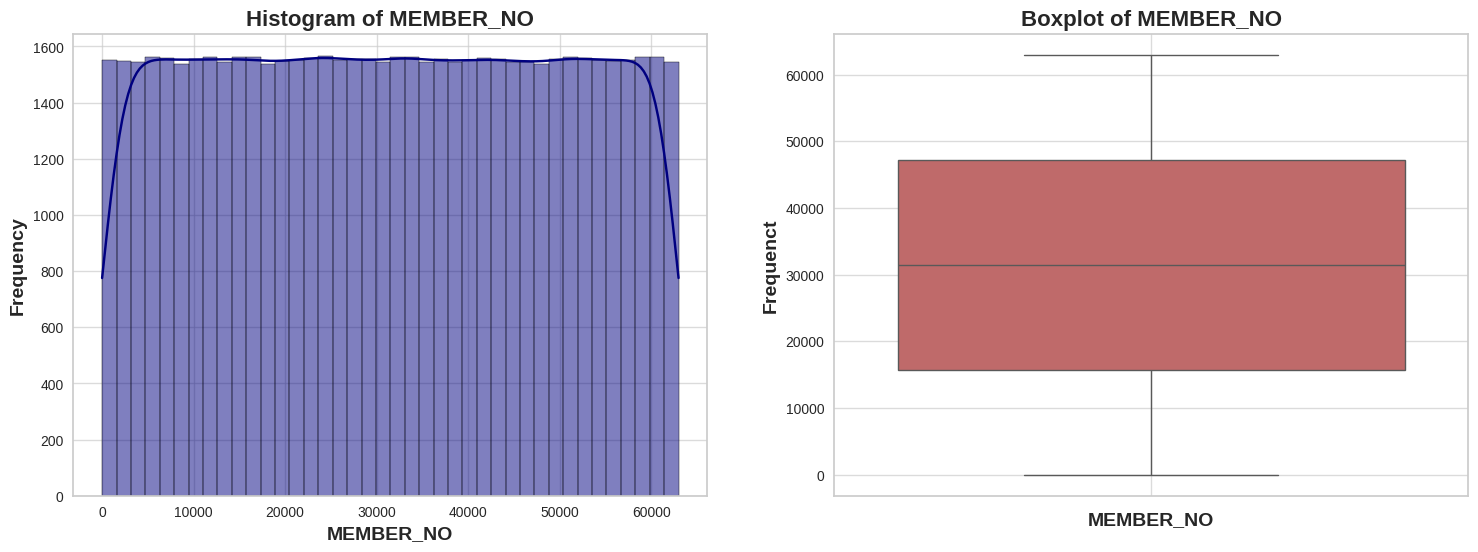

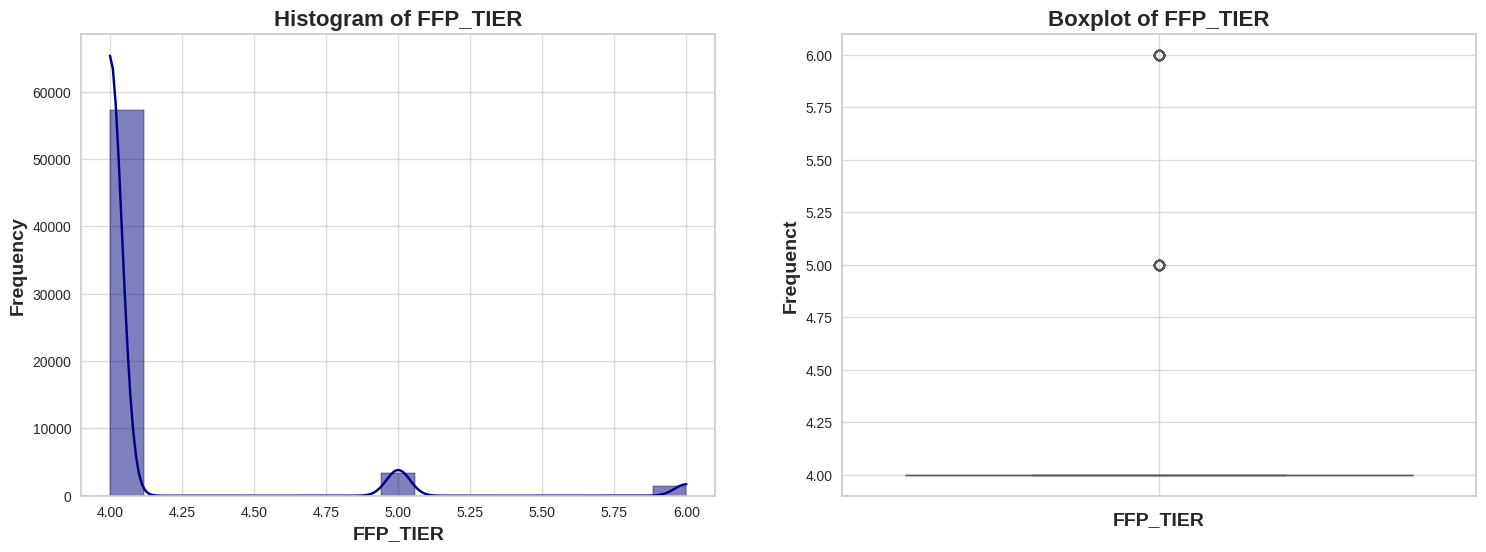

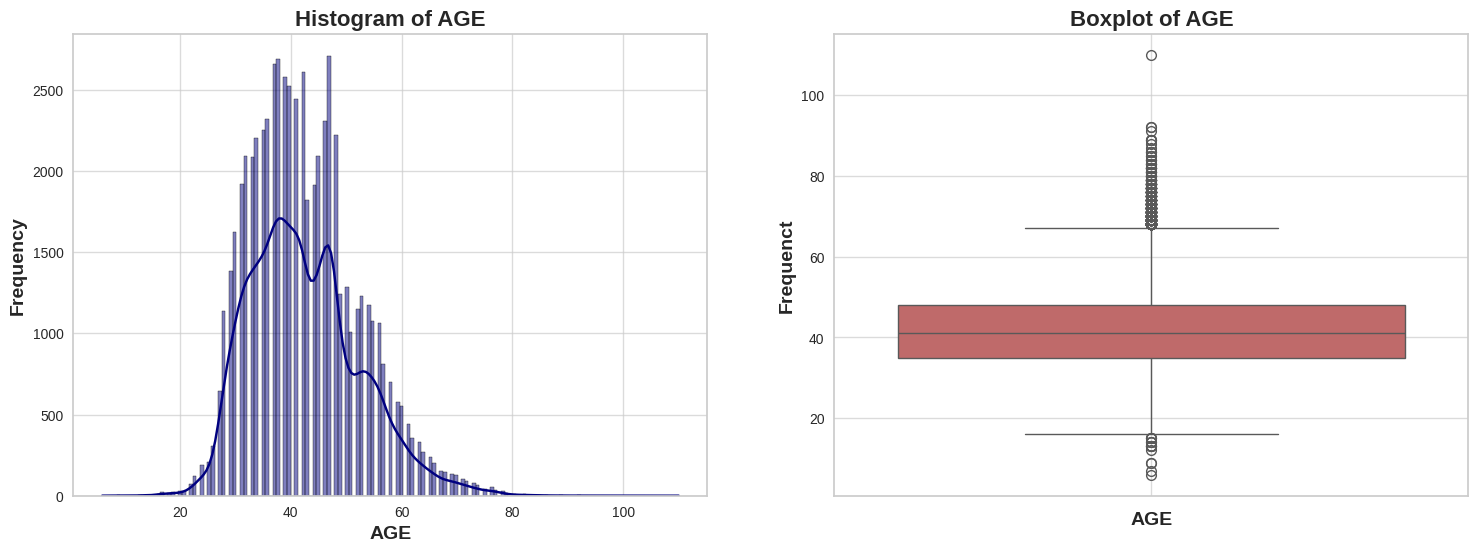

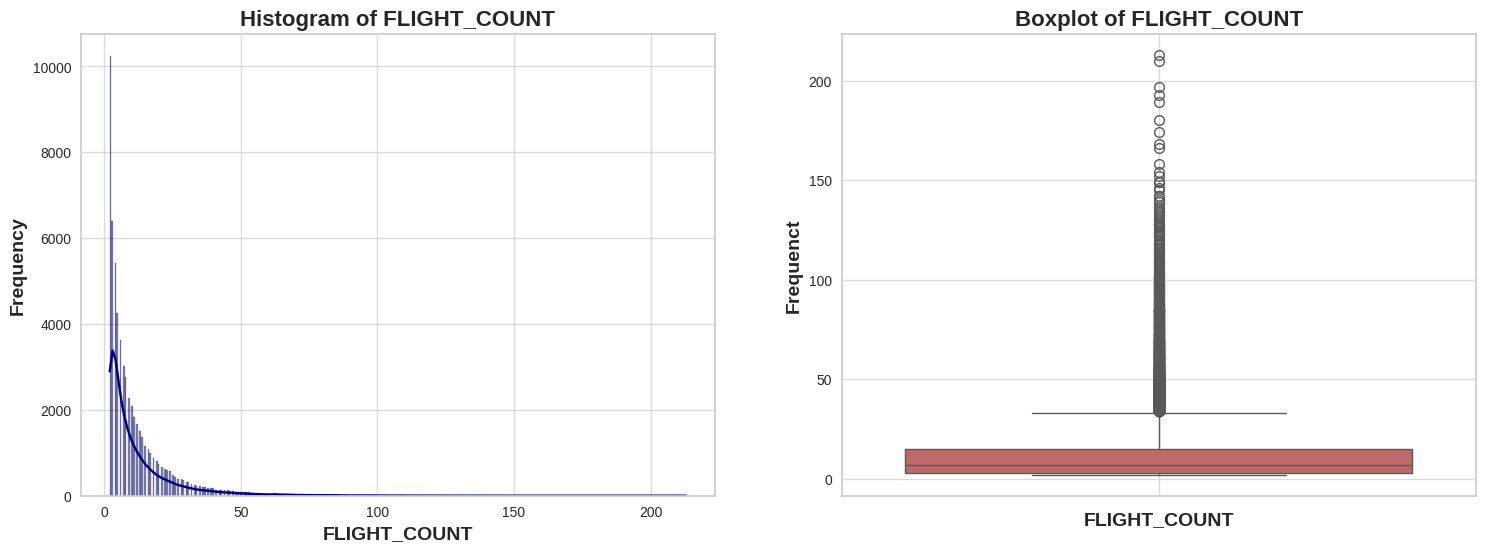

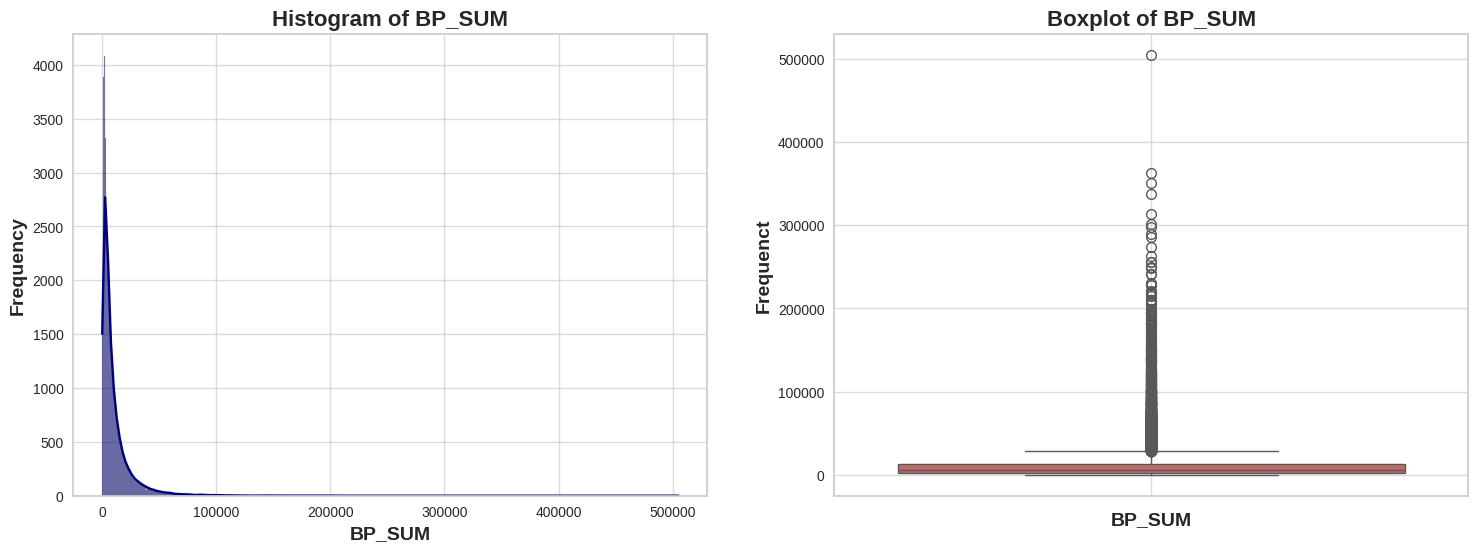

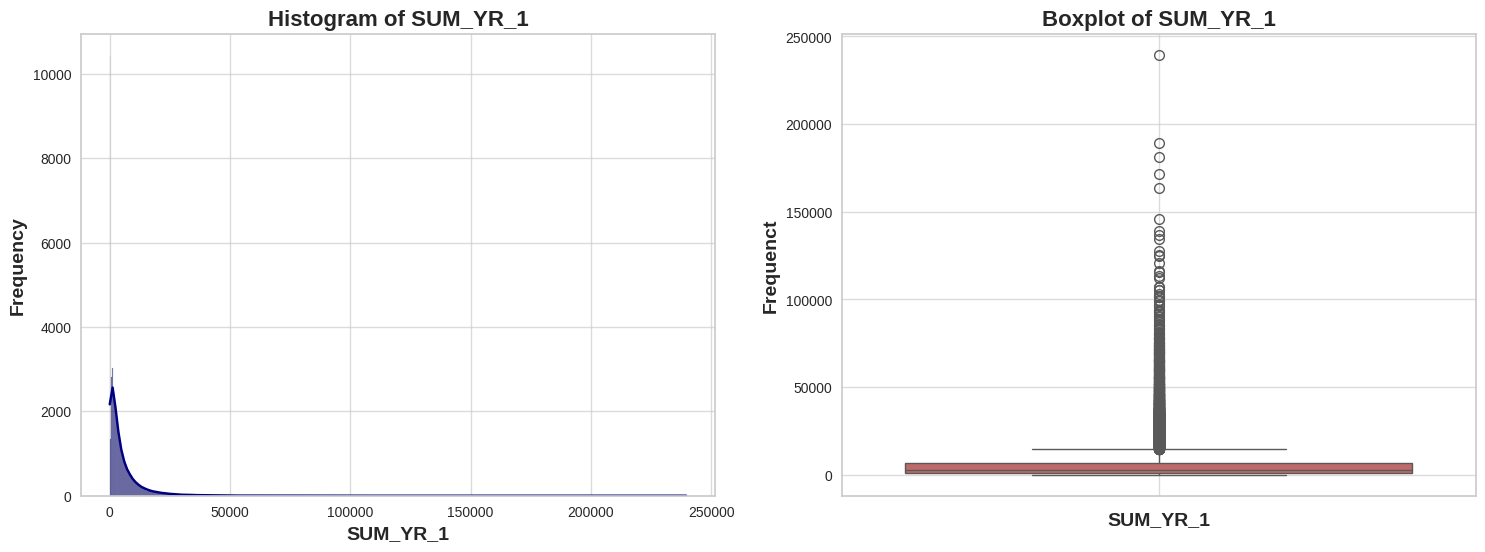

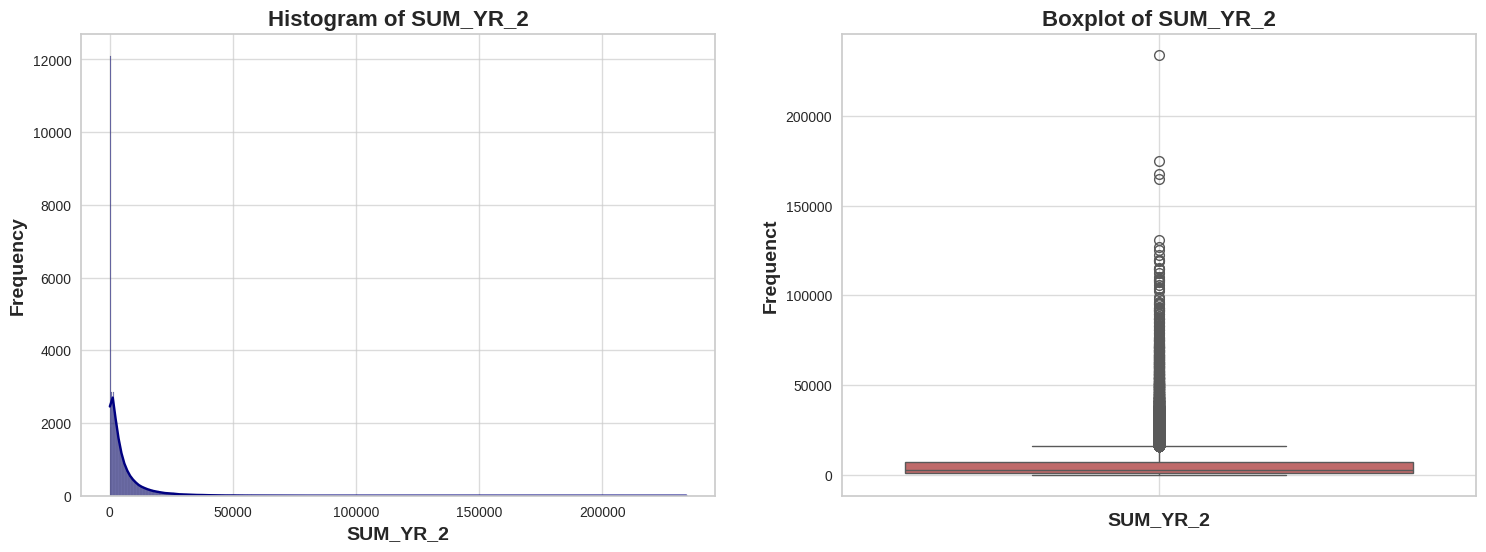

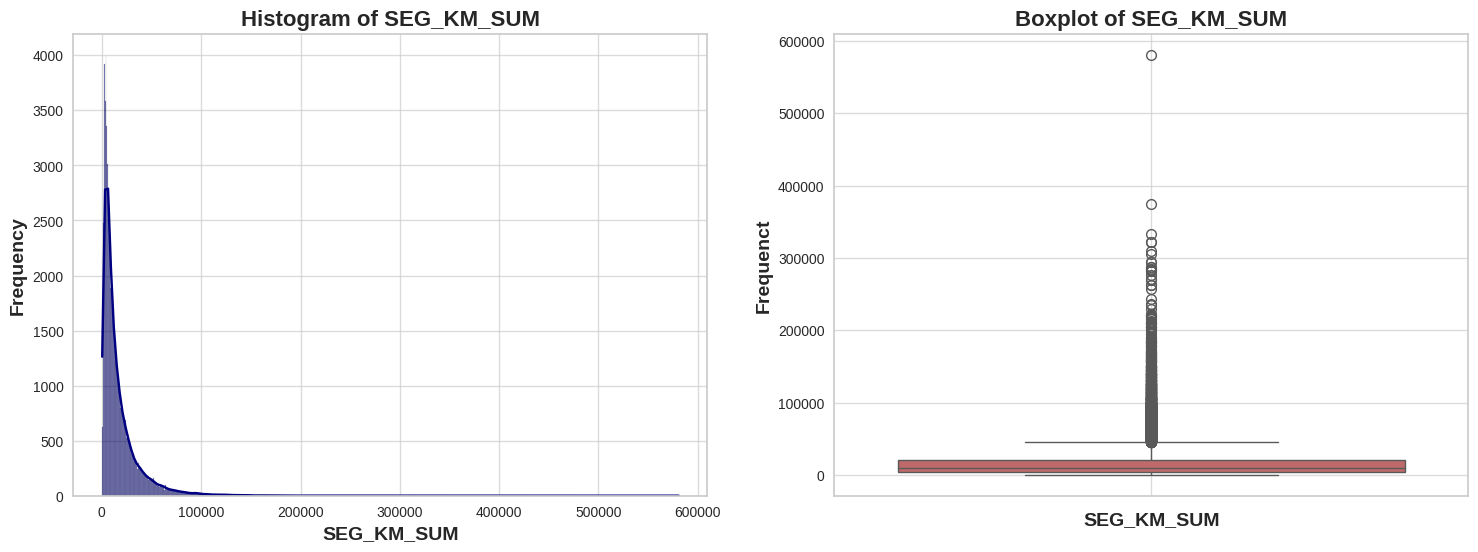

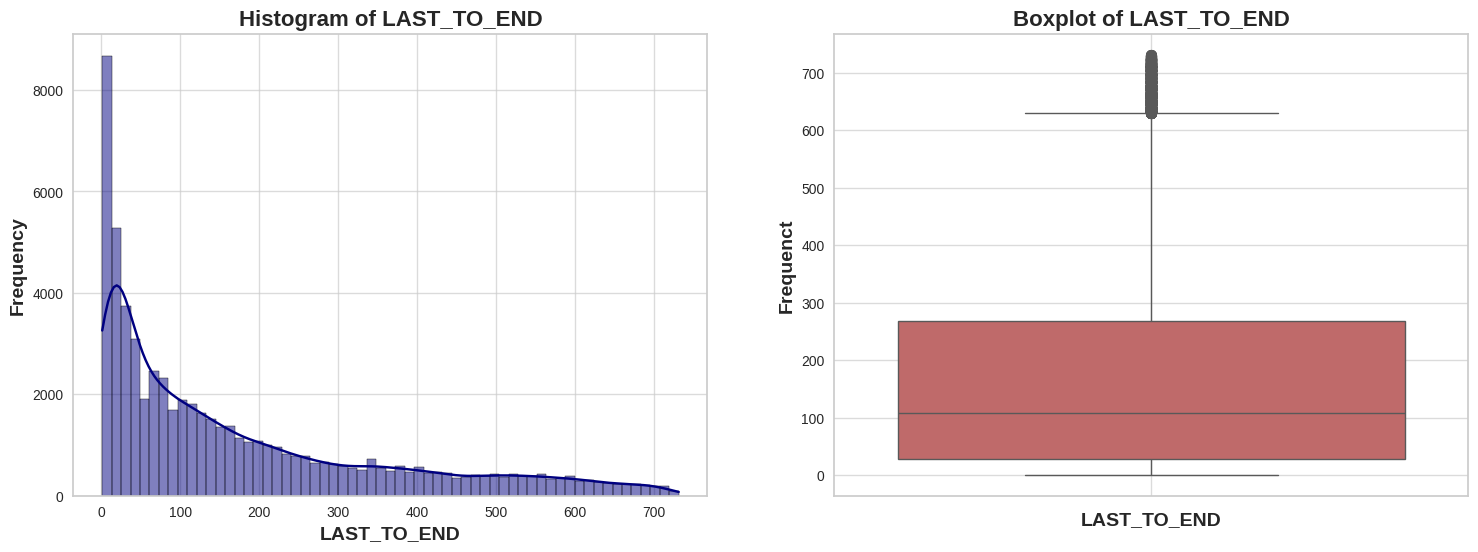

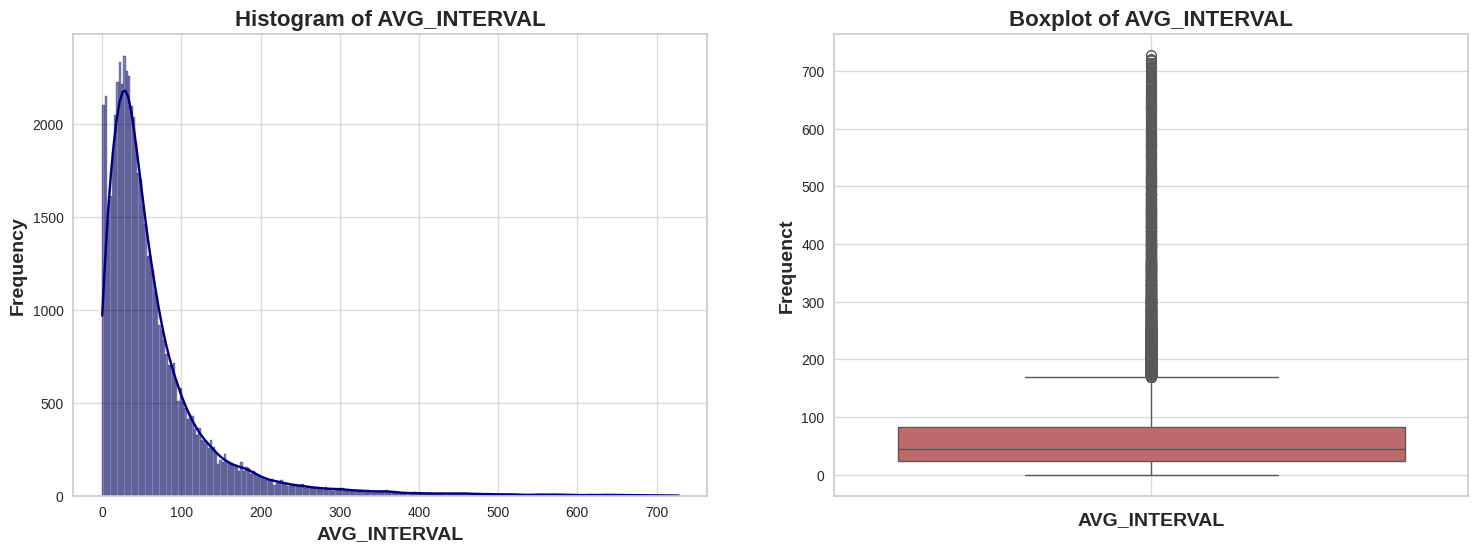

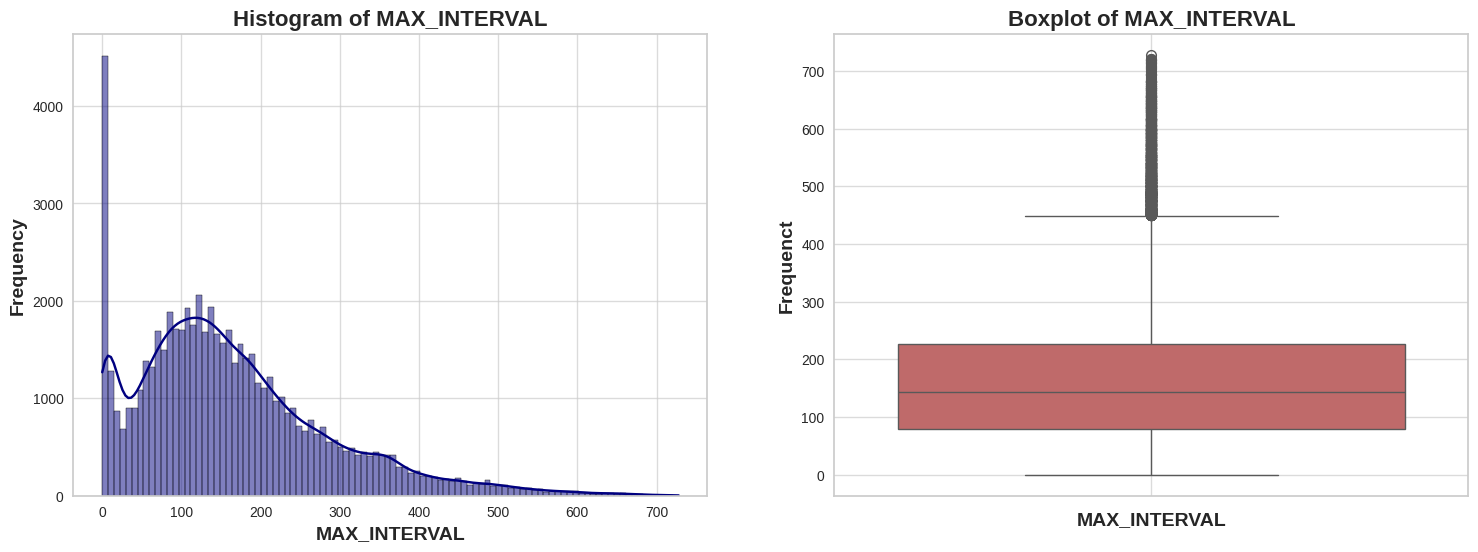

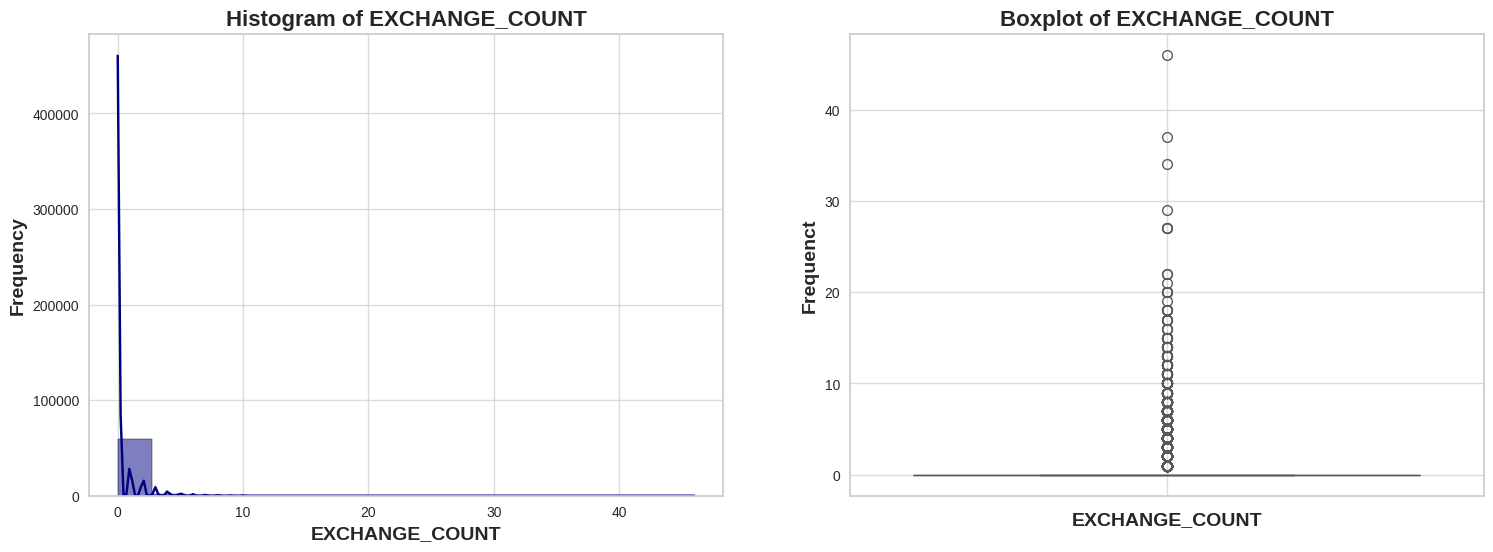

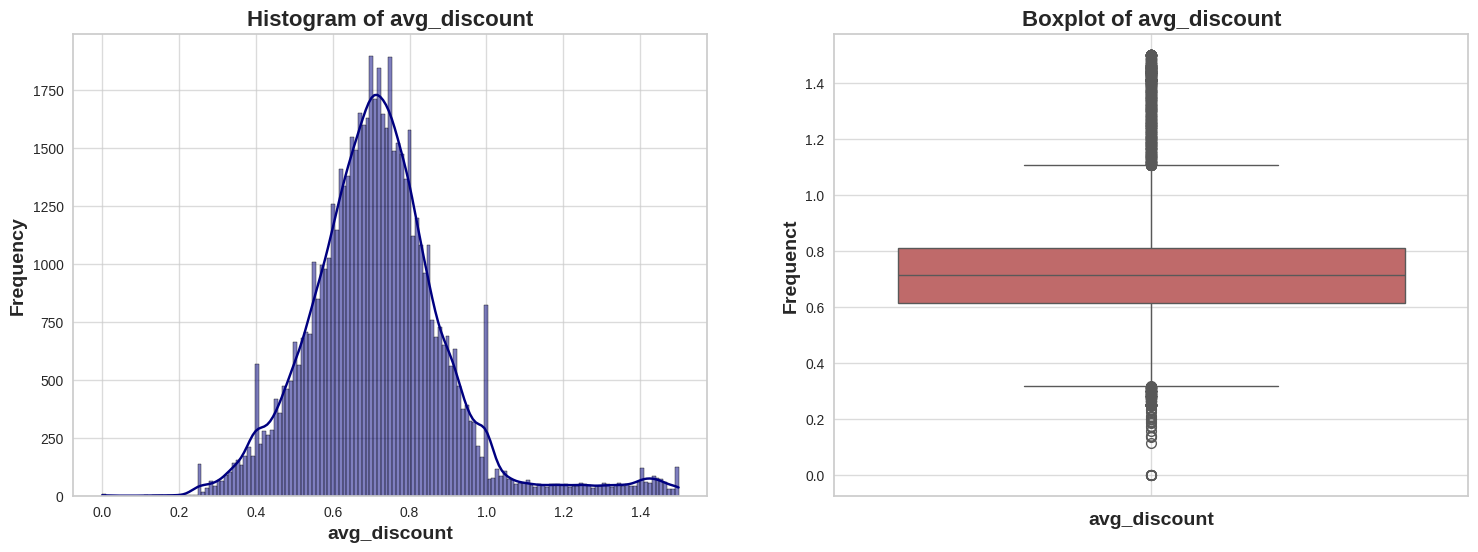

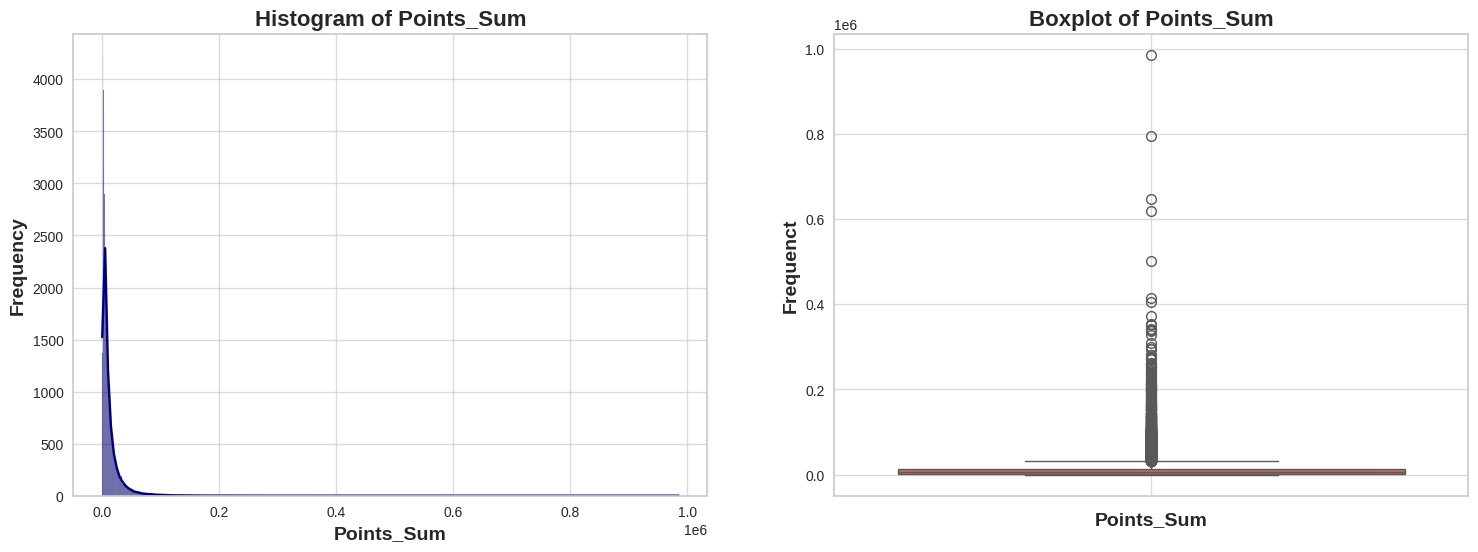

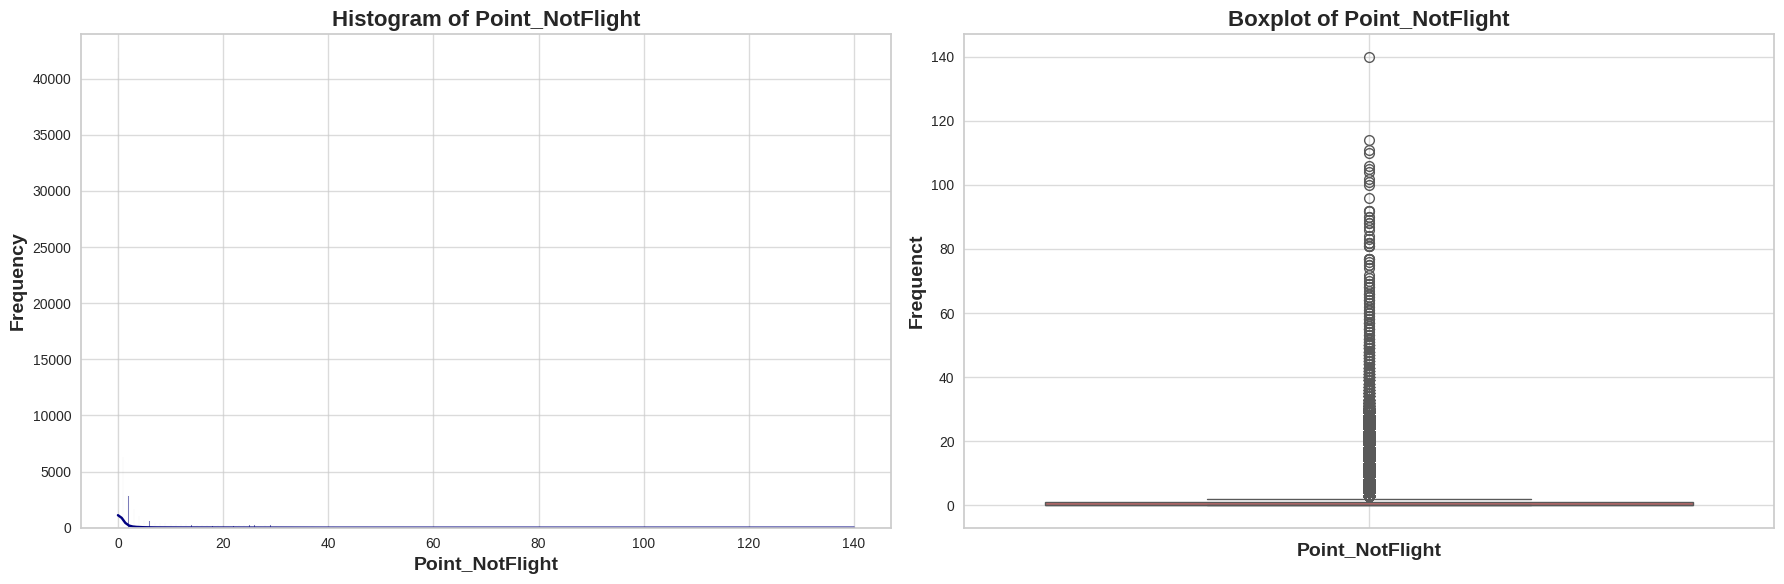

In [ ]:
numeric_cols = df.select_dtypes('number').columns
distribution_data(df[numeric_cols])

In [ ]:
df.describe()

MEMBER_NO                       FFP_DATE  \
count  62116.000000                          62116   
mean   31494.110117  2010-03-11 13:23:32.969283072   
min        2.000000            2004-11-01 00:00:00   
25%    15745.750000            2008-04-17 00:00:00   
50%    31493.500000            2010-10-16 00:00:00   
75%    47243.250000            2012-03-31 00:00:00   
max    62988.000000            2013-03-31 00:00:00   
std    18181.013263                            NaN   

                   FIRST_FLIGHT_DATE      FFP_TIER           AGE  \
count                          62116  62116.000000  62116.000000   
mean   2010-09-05 01:05:02.994397440      4.102196     42.477381   
min              1905-12-31 00:00:00      4.000000      6.000000   
25%              2008-12-22 00:00:00      4.000000     35.000000   
50%              2011-04-28 00:00:00      4.000000     41.000000   
75%              2012-07-27 00:00:00      4.000000     48.000000   
max              2015-05-30 00:00:00      6.000000    110.000000   
std                              NaN      0.374105      9.885613   

                           LOAD_TIME  FLIGHT_COUNT         BP_SUM  \
count                          62116  62116.000000   62116.000000   
mean   2014-03-31 00:00:00.000000256     11.838303   10922.613723   
min              2014-03-31 00:00:00      2.000000       0.000000   
25%              2014-03-31 00:00:00      3.000000    2515.750000   
50%              2014-03-31 00:00:00      7.000000    5692.500000   
75%              2014-03-31 00:00:00     15.000000   12816.250000   
max              2014-03-31 00:00:00    213.000000  505308.000000   
std                              NaN     14.076594   16346.076330   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM  \
count   62116.000000   62116.000000   62116.000000   
mean     5312.938153    5585.056427   17123.184832   
min         0.000000       0.000000     368.000000   
25%       960.000000     760.000000    4746.000000   
50%      2756.000000    2751.500000    9982.000000   
75%      6525.000000    6816.000000   21243.250000   
max    239560.000000  234188.000000  580717.000000   
std      8106.140495    8679.429867   20990.999640   

                    LAST_FLIGHT_DATE   LAST_TO_END  AVG_INTERVAL  \
count                          62116  62116.000000  62116.000000   
mean   2013-10-06 20:03:21.223517440    176.901104     67.760041   
min              2012-04-01 00:00:00      1.000000      0.000000   
25%              2013-07-07 00:00:00     29.000000     23.333333   
50%              2013-12-14 00:00:00    109.000000     44.636364   
75%              2014-03-03 00:00:00    269.000000     82.000000   
max              2014-03-31 00:00:00    731.000000    728.000000   
std                              NaN    184.017602     77.608156   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount     Points_Sum  \
count  62116.000000    62116.000000  62116.000000   62116.000000   
mean     165.938148        0.320755      0.721346   12546.793548   
min        0.000000        0.000000      0.000000       0.000000   
25%       79.000000        0.000000      0.611789    2774.000000   
50%      143.000000        0.000000      0.711656    6322.000000   
75%      227.000000        0.000000      0.809385   14286.250000   
max      728.000000       46.000000      1.500000  985572.000000   
std      123.344329        1.140216      0.185254   20533.103075   

       Point_NotFlight  
count     62116.000000  
mean          2.739262  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000  
std           7.377669

**Observations :**
1. `FLIGHT_COUNT` : Data has right-skew distribution with 75% of data lies around value below 15. There are lots of outliers with total flights up to 213
2. `AGE` : The majority of customers are aged between 35 and 48 years. There are many outliers, particularly customers over 50 years old. There is even a customer recorded as 110 years old — which is unusual, but perhaps still makes sense. This needs further investigation
3. `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `POINTS_SUM`: Data has right-skew distribution with lots of outliers above upper limit
4.  `avg_discount` : Although there are lots of outliers both below lower limit and above upper limit, the data has quite normal distribution with mean and median values are similar (around 0.7)
5. `MAX_INTERVAL`: Data has bimodal distribution with peaks at around 0 and values range from 100 - 150
6. `FIRST_FLIGHT_DATE` : there is weird value where the first flight was done in 1905

Some columns will be further investigated to know their outliers


In [ ]:
# function to check outliers (IQR method)
def check_outlier(col) :
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  # determine upper and lower limit
  upper_limit = (1.5 * iqr) + q3
  lower_limit = q1 - (1.5 * iqr)

  condition_outliers = (df[col] < lower_limit) | (df[col] > upper_limit)
  return condition_outliers

In [ ]:
outliers_age = check_outlier('AGE')
df[outliers_age].sort_values('AGE', ascending=False)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
23268      20264 2005-04-14        2005-05-18  Female         4  shenzhenshi   
50696      54922 2006-09-11        2006-09-11    Male         4      elmonte   
62501       2072 2005-02-10        2005-04-02    Male         4      conghua   
59352      54746 2006-05-11        2006-05-11    Male         4    guangzhou   
26266       3445 2008-07-05        2009-03-15    Male         4      beijing   
...          ...        ...               ...     ...       ...          ...   
3971       15274 2012-01-10        2012-01-10  Female         4      arcadia   
53155       6574 2012-08-09        2012-08-09    Male         4     riverton   
62411      31831 2010-11-19        2010-11-19    Male         4     shenzhen   
36825      53135 2013-01-26        2013-01-26  Female         4      beijing   
48962      37520 2010-12-26        2011-04-15    Male         4         wuxi   

      WORK_PROVINCE   WORK_COUNTRY    AGE  LOAD_TIME  ...  SUM_YR_2  \
23268     guangdong          China  110.0 2014-03-31  ...    2888.0   
50696            ca  United States   92.0 2014-03-31  ...     762.0   
62501     guangdong          China   92.0 2014-03-31  ...       0.0   
59352     guangdong          China   91.0 2014-03-31  ...       0.0   
26266       beijing          China   89.0 2014-03-31  ...       0.0   
...             ...            ...    ...        ...  ...       ...   
3971     california  United States   12.0 2014-03-31  ...   23500.0   
53155          utan          China    9.0 2014-03-31  ...       0.0   
62411     guangdong          China    9.0 2014-03-31  ...       0.0   
36825             .          China    7.0 2014-03-31  ...       0.0   
48962       jiangsu          China    6.0 2014-03-31  ...     632.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
23268       14053        2013-04-06          361     50.333333          214   
50696        4243        2013-10-20          164    258.500000          262   
62501        1036        2013-01-05          452     12.000000           12   
59352        2287        2012-10-24          525     66.500000          132   
26266        7830        2013-05-13          324     78.200000          322   
...           ...               ...          ...           ...          ...   
3971        36696        2013-08-21          224    115.000000          184   
53155       14517        2012-09-01          578     23.000000           23   
62411        1732        2013-01-09          448    211.000000          211   
36825        5420        2013-01-29          428      3.000000            3   
48962        4218        2014-02-18           43    228.000000          671   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
23268               1      0.740881       11194                3  
50696               0      0.624268        2082                0  
62501               0      0.673359         766                0  
59352               1      0.598076        1234                1  
26266               0      1.144125        8159                0  
...               ...           ...         ...              ...  
3971                0      1.050000       45363                0  
53155               0      0.157402        1924                0  
62411               0      0.420525         500                0  
36825               0      1.000000        5086                0  
48962               0      0.692845        2494                0  

[990 rows x 23 columns]

In [ ]:
outliers_flight_date = check_outlier('FIRST_FLIGHT_DATE')
df[outliers_flight_date].sort_values('FIRST_FLIGHT_DATE', ascending=True)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER     WORK_CITY  \
4455       41193 2011-02-27        1905-12-31    Male         4        dalian   
30099       1999 2004-11-10        1905-12-31  Female         4  guangzhoushi   

        WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  \
4455         liaoning        China  35.0 2014-03-31  ...   22244.0   
30099  guangdongsheng        China  37.0 2014-03-31  ...    1907.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
4455        52763        2014-03-14           18     18.051282           92   
30099        9592        2013-11-19          134     75.000000          178   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
4455                1      0.688062       33588               27  
30099               1      0.775909       26192               38  

[2 rows x 23 columns]

**Observation :**
1. `AGE` : There is one row showing a customer aged 110 years old, while other outliers remain below 100. Since it's a bit unusual for people aged >100 years to travel by flight, this row will be dropped
2. `FIRST_FLIGHT_DATE` : There are two records where customers aged 35 and 37 years old took their first flights in 1905 which is impossible. These records will be dropped
3. Remaining features : Remaining features will be kept for a while. Outliers will be removed after selecting necessary features


In [ ]:
df = df[~outliers_age]
df = df[~outliers_flight_date]

/tmp/ipython-input-102-3537302655.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_flight_date]


## **Feature Engineering**

This project will use LRFMC model which is a modified RFM model. This model was chosen instead of original RFM model since there are some academic papers ([1](https://iopscience.iop.org/article/10.1088/1742-6596/1168/3/032086), [2](https://www.ijser.in/archives/v10i5/SE22525122734.pdf)) and portofolio projects ([1](https://github.com/Rizal-A/KMeans-Clustering-Airline-Customer-Value-Analysis), [2](https://www.kaggle.com/code/edisugiarto/airline-customer-segmentation), [3](https://github.com/faizns/Airline-Customer-Segmentation-Based-on-LRFMC-Model-Using-KMeans)) used this model. Based on a paper by  [Wu (2022)](https://www.ijser.in/archives/v10i5/SE22525122734.pdf), LRFMC consists of five indicators : length of customer's
membership (L), consumption interval (R), consumption
frequency (F), total flight miles (M) and mean value of cabin
discount coefficient (C). The meaning of each indicator is defined as follows :


| **Indicator** | **Meaning** |
|----------------|-------------|
| **L** | Interval between joining and current time |
| **R** | Interval between the latest consumption time and the current time |
| **F** | Number of rides in the observation time window |
| **M** | Number of miles flown within the observation time window |
| **C** | Average value of discount factor corresponding to class of cabin |



In this case, features that will be selected for clustering will be :
*   L = `LOAD_TIME` - `FFP_DATE`
*   R = `LAST__TO_END`
*   F = `FLIGHT_COUNT`
*   M = `SEG_KM_SUM`
*   C = `avg_discount`

In [ ]:
# add new column 'L'
df['Membership'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days+1 # load_time + 1 - first_flight_date
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993 2006-11-02        2008-12-24   Male         6            .   
1      28065 2007-02-19        2007-08-03   Male         6          NaN   
2      55106 2007-02-01        2007-08-30   Male         6            .   
3      21189 2008-08-22        2008-08-23   Male         5  los angeles   
4      39546 2009-04-10        2009-04-15   Male         6      guiyang   

  WORK_PROVINCE   WORK_COUNTRY   AGE  LOAD_TIME  ...  SEG_KM_SUM  \
0       beijing          China  31.0 2014-03-31  ...      580717   
1       beijing          China  42.0 2014-03-31  ...      293678   
2       beijing          China  40.0 2014-03-31  ...      283712   
3            ca  United States  64.0 2014-03-31  ...      281336   
4       guizhou          China  48.0 2014-03-31  ...      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL EXCHANGE_COUNT  \
0        2014-03-31            1      3.483254            18             34   
1        2014-03-25            7      5.194245            17             29   
2        2014-03-21           11      5.298507            18             20   
3        2013-12-26           97     27.863636            73             11   
4        2014-03-27            5      4.788079            47             27   

   avg_discount  Points_Sum  Point_NotFlight  Membership  
0      0.961639      619760               50        2707  
1      1.252314      415768               33        2598  
2      1.254676      406361               26        2616  
3      1.090870      372204               12        2048  
4      0.970658      338813               39        1817  

[5 rows x 24 columns]

In [ ]:
df.shape

(61124, 24)

# **EXPLORATORY DATA ANALYSIS**

## **Categorical Columns**

In [ ]:
# categorize age for visualization
# children : 0 - 14; youth 15 -24; adults 25 - 64; senior >65
df['age_group'] = df['AGE'].apply(lambda x :
                                  'Children' if x in range(0,15) else
                                  'Youth' if x in range(15,25) else
                                  'Adults' if x in range(25, 65) else
                                  'Senior' )

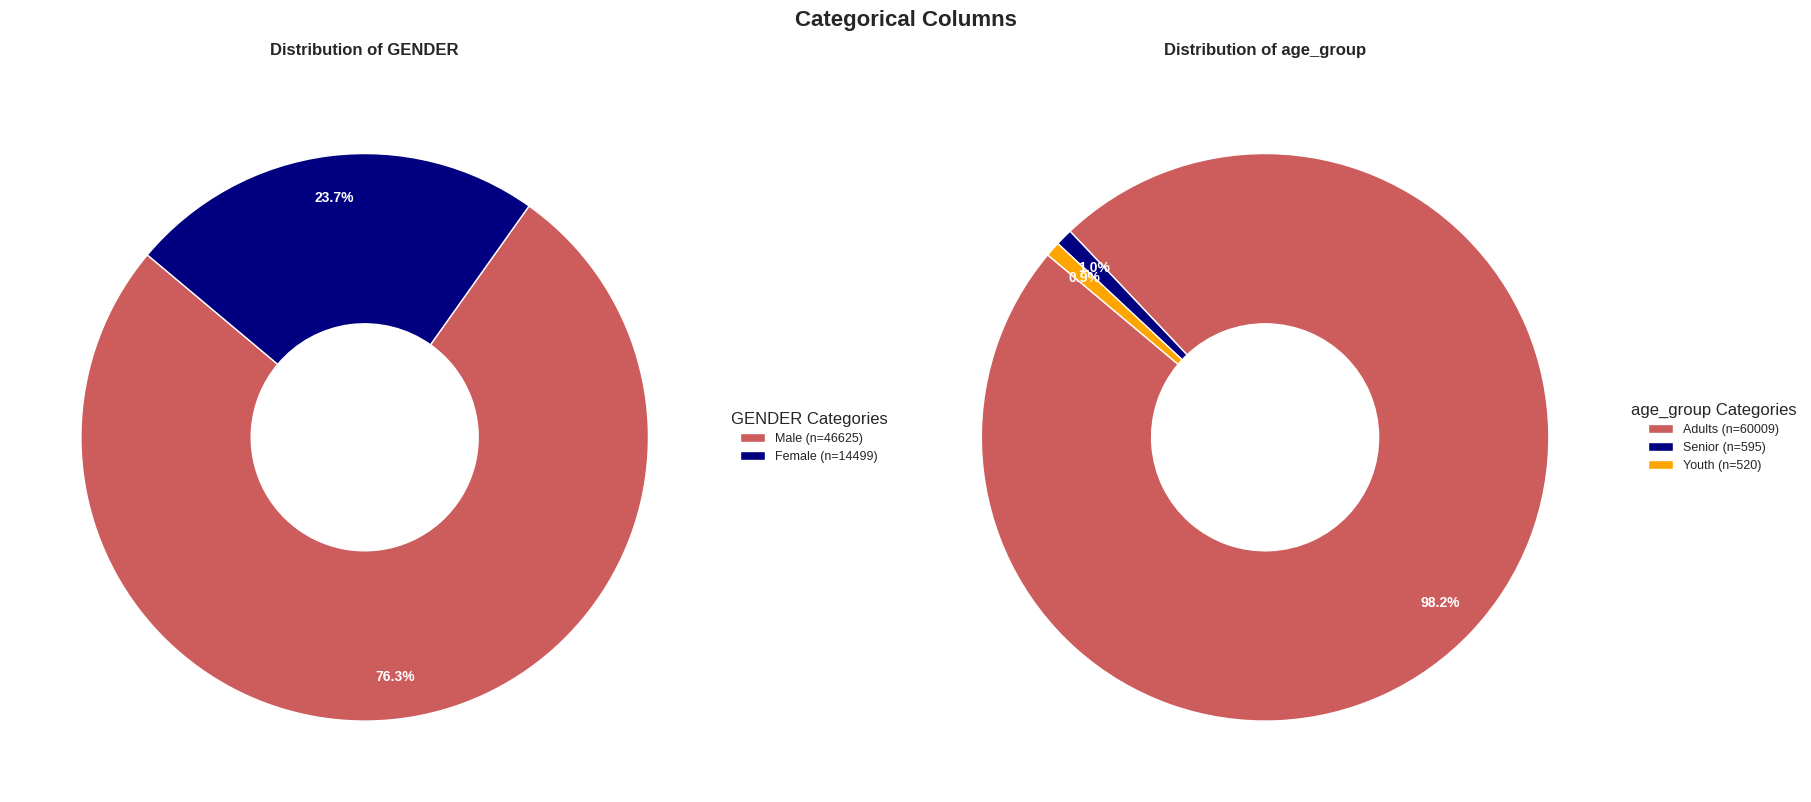

In [ ]:
categorical_cols = ['GENDER','age_group']

# Custom muted palette
custom_palette = ['indianred', 'navy', 'orange',
                  '#8B3A3A', '#000080', '#FFA500']  # Darker variants for muted effect


# Set up subplots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8*n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    counts = df[col].value_counts()

    # Use modulo to cycle through custom colors
    colors = [custom_palette[i % len(custom_palette)] for i in range(len(counts))]

    # Create donut chart (more space-efficient)
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'width': 0.6, 'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'},
        pctdistance=0.85  # Push percentages inward
    )

    # Add legend with counts
    legend_labels = [f"{label} (n={count})" for label, count in zip(counts.index, counts)]
    ax.legend(wedges, legend_labels,
              title=f"{col} Categories",
              loc="center left",
              bbox_to_anchor=(1, 0.5),
              fontsize=9)

    # Add center title
    ax.set_title(f"Distribution of {col}", fontsize=12, pad=20, fontweight='bold')

    # Custom label styling
    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight('bold')

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Categorical Columns',
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

**Observations :**
1. Airline passengers are dominated by male passengers (76.4%)
2. 96.6% of passengers are adults with age ranges from 25 years old to 64 years old

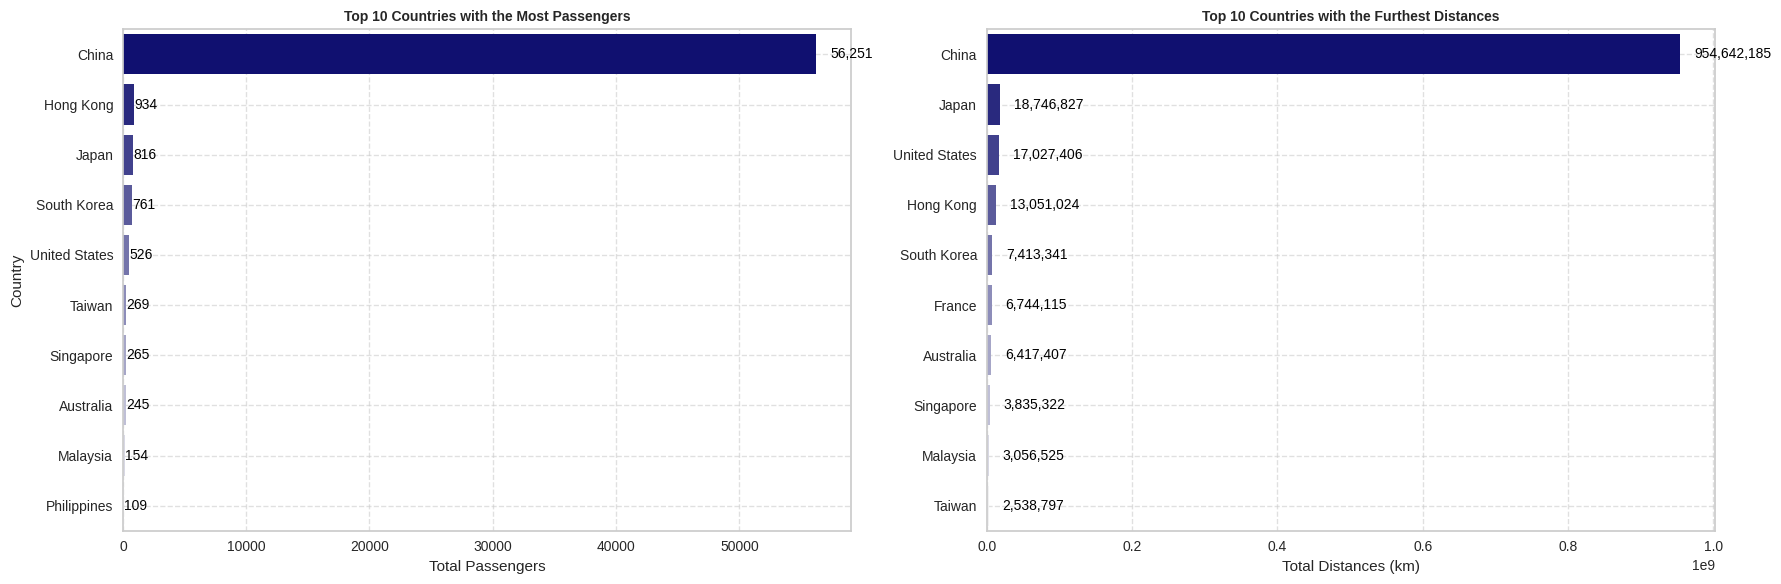

In [ ]:
# TOP 10 COUNTRIES WITH THE MOST PASSENGERS AND THE FURTHEST DISTANCE

# group by columns "WORK_COUNTRY" and "MEMBER_NO"
top_10_passengers = df.groupby('WORK_COUNTRY')['MEMBER_NO'].nunique().reset_index().sort_values('MEMBER_NO', ascending=False).head(10)

# group by columns "WORK_COUNTRY" and "SEG_KM_SUM"
top_10_distances = df.groupby('WORK_COUNTRY')['SEG_KM_SUM'].sum().reset_index().sort_values('SEG_KM_SUM', ascending=False).head(10)

# Set up figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1
sns.barplot(data = top_10_passengers, x= 'MEMBER_NO', y='WORK_COUNTRY', ax=axes[0], hue='WORK_COUNTRY', palette = sns.light_palette('navy', n_colors = 10, reverse=True))
axes[0].set_title('Top 10 Countries with the Most Passengers', size=10, weight='bold')
axes[0].set_xlabel('Total Passengers')
axes[0].set_ylabel('Country')
axes[0].grid(linestyle='--', alpha=0.6)

# add text
for idx, value in enumerate(top_10_passengers['MEMBER_NO']):
    axes[0].text(
        value + (value * 0.02),
        idx,
        f'{int(value):,}',
        color='black', ha='left', va='center', fontsize=10)


# PLOT 2
sns.barplot(data = top_10_distances, x= 'SEG_KM_SUM', y='WORK_COUNTRY', ax=axes[1], hue='WORK_COUNTRY', palette = sns.light_palette('navy', n_colors = 10, reverse=True))
axes[1].set_title('Top 10 Countries with the Furthest Distances', size=10, weight='bold')
axes[1].set_xlabel('Total Distances (km)')
axes[1].set_ylabel('')
axes[1].grid(linestyle='--', alpha=0.6)


# add text
for idx, value in enumerate(top_10_distances['SEG_KM_SUM']):
    axes[1].text(
        value + (top_10_distances['SEG_KM_SUM'].max() * 0.02),
        idx,
        f'{int(value):,}',
        color='black', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Observations :**
1. China consistently has the highest number of passengers and the greatest total travel distance. This indicates that Chinese passengers are not only the most numerous but also tend to fly more frequently
2. Although the Philippines is among the top 10 countries with the highest number of passengers, it does not appear in the top 10 countries with the greatest total travel distance. This suggests that passengers from the Philippines tend to fly less frequently or only over shorter distances
3. France is one of country with the greatest total distance despite being not being in the top 10 countries by passenger count.  This indicates that passengers from France travels by plane very often, thus, comprise the low number of passengers  
4. Although South Korea surpasses the United States in the number of passengers, the total distance traveled by U.S. passengers reached 18 billion km — more than double that of South Korea, at 7 billion km

## **Correlation Analysis**

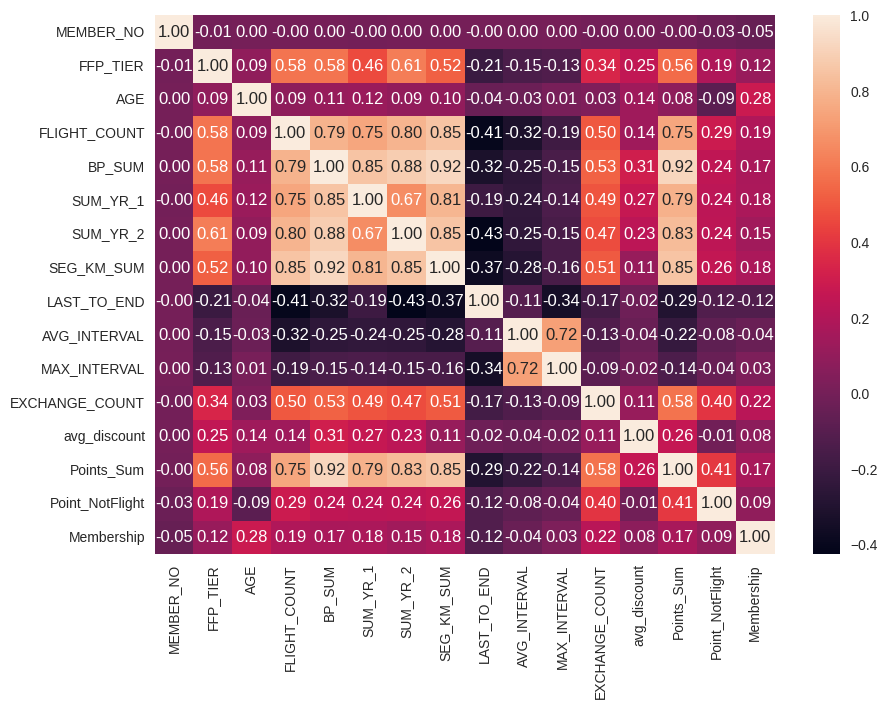

In [ ]:
numerical_cols = [df.select_dtypes('number').columns]
numerical_cols = numerical_cols[0].tolist()
#
# heatmap correlation
corr = df[numerical_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Observations :**
1. `BP_SUM` has a very high positive correlation with `POINTS_SUM`. This indicates that passengers who plan more trips (`BP_SUM`) tend to accumulate more points
2. `FFP_TIER` has moderate positive correlations with `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_2`, `SEG_KM_SUM` (0.5 - 0.6), suggesting that the more frequent passengers travel by flight the higher tier they will get in the program
3. `Membership` duration has little impact on other variables
4. `FLIGHT_COUNT`, `POINTS_SUM`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2` have high positive correlations with each other. This makes sense since more trips done by passengers more points they will get
5. `EXCHANGE_COUNT` has moderate positive correlations with `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`.  This suggests that passengers who exchange more points tend to have higher travel distances, take more flights, and accumulate more points overall.

# **DATA PREPARATION FOR CLUSTERING**

In [ ]:
df_cluster = df.groupby('MEMBER_NO').agg({
    'LAST_TO_END': 'max',
    'FLIGHT_COUNT': 'sum',
    'SEG_KM_SUM': 'sum',
    'avg_discount': 'mean',
    'Membership': 'max'
})

# change column names
df_cluster.columns = ['Recency', 'Frequency', 'Monetary', 'Dicsount', 'Length']
df_cluster.head()

Recency  Frequency  Monetary  Dicsount  Length
MEMBER_NO                                                
2              114         24     35087  0.615947    2923
3               84          9     20660  0.522271    2916
4               30         12     23071  0.511084    2791
6               47          3      4608  0.646667    1293
7              535          2      3390  0.475000    1069

In [ ]:
# check descriptive dataset
df_cluster.describe()

Recency     Frequency       Monetary      Dicsount        Length
count  61124.000000  61124.000000   61124.000000  61124.000000  61124.000000
mean     176.377659     11.862738   17121.255628      0.720949   1476.025604
std      183.685574     14.092059   20982.072542      0.184389    844.121831
min        1.000000      2.000000     368.000000      0.000000    366.000000
25%       29.000000      3.000000    4745.000000      0.611838    730.000000
50%      108.000000      7.000000    9978.000000      0.711596   1257.000000
75%      268.000000     15.000000   21224.750000      0.809093   2168.000000
max      731.000000    213.000000  580717.000000      1.500000   3438.000000

**Observation :** there are no abnormal values in any column

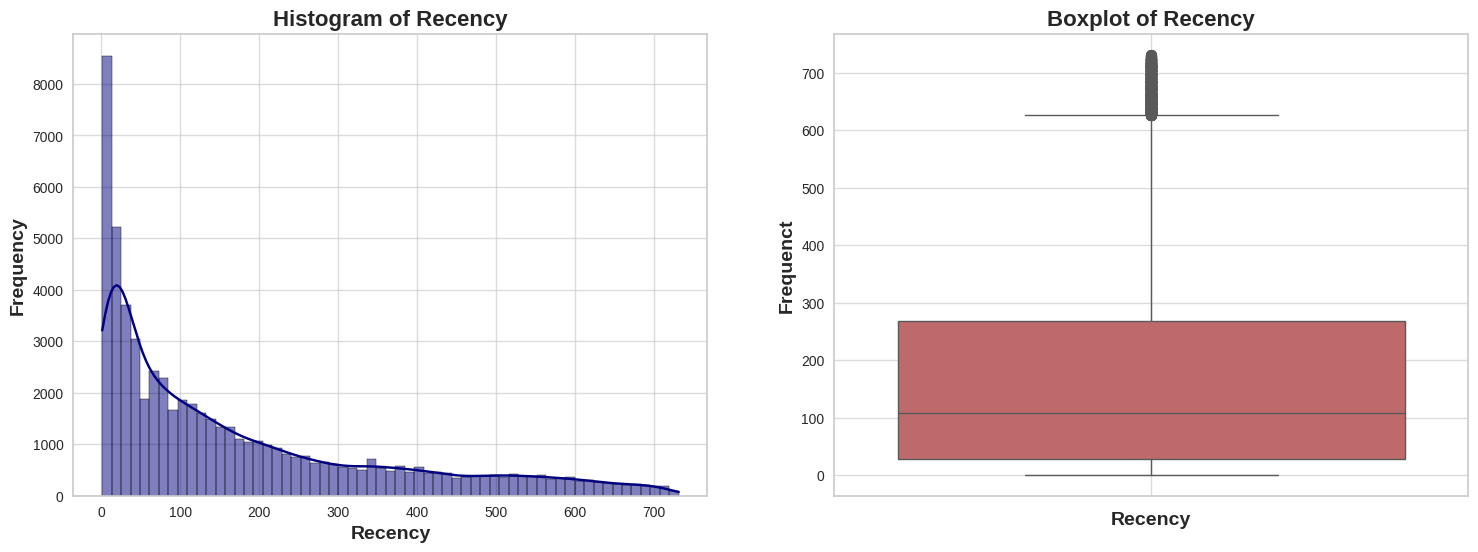

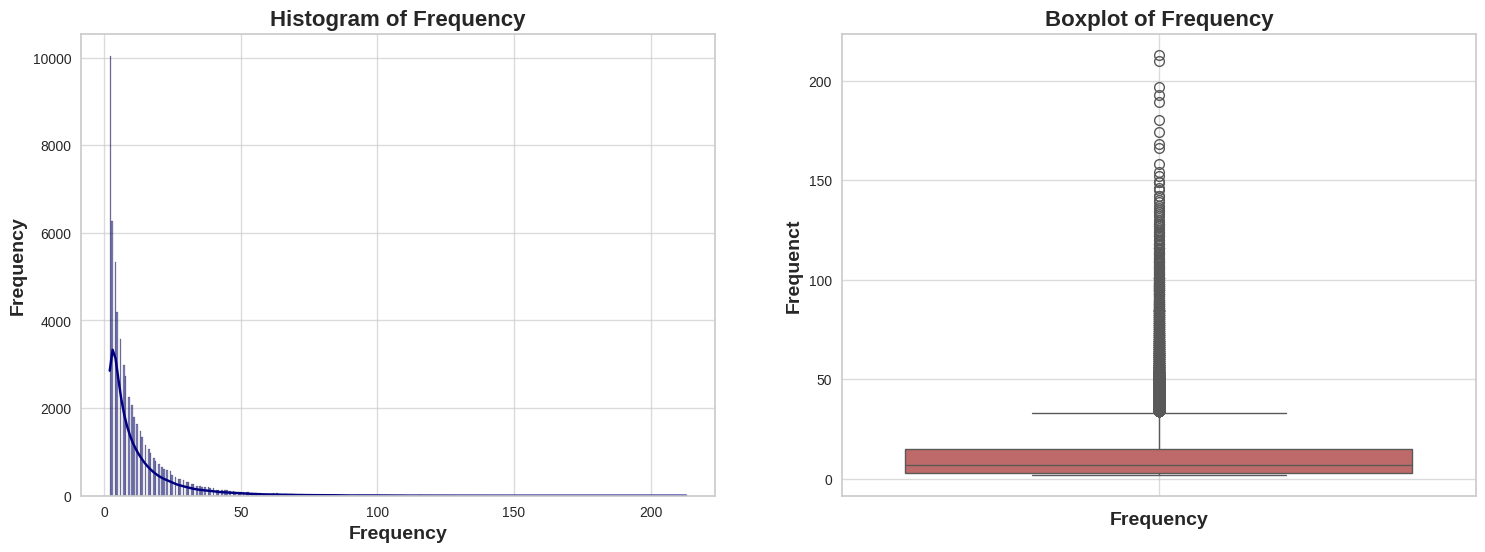

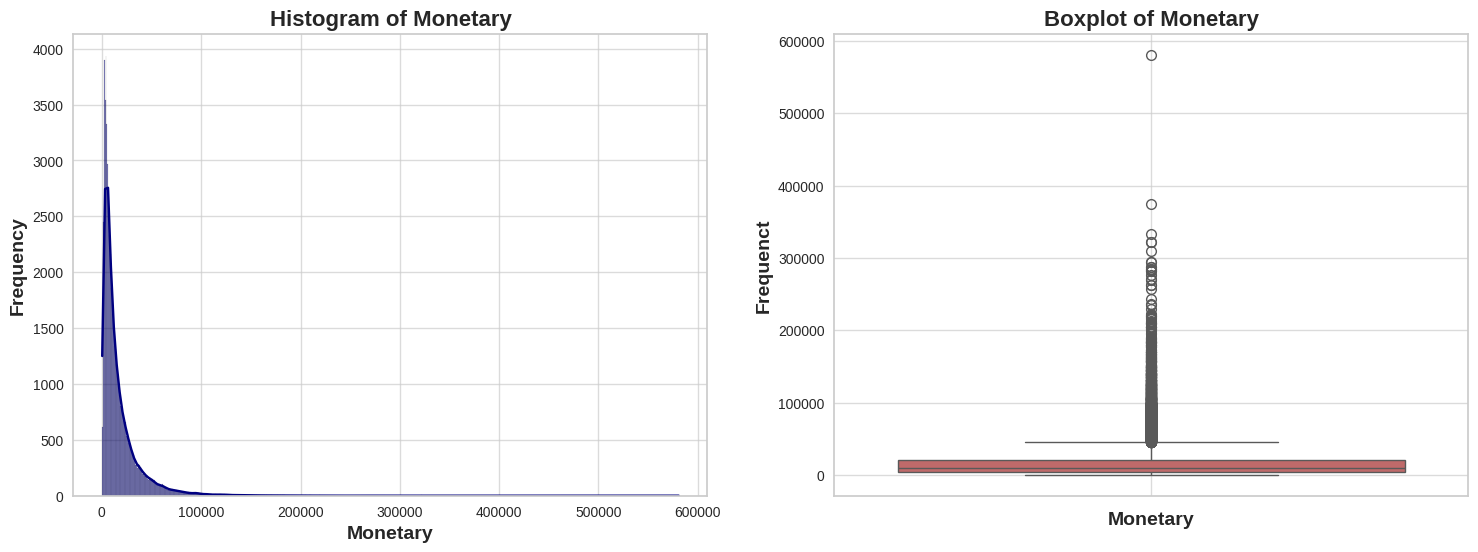

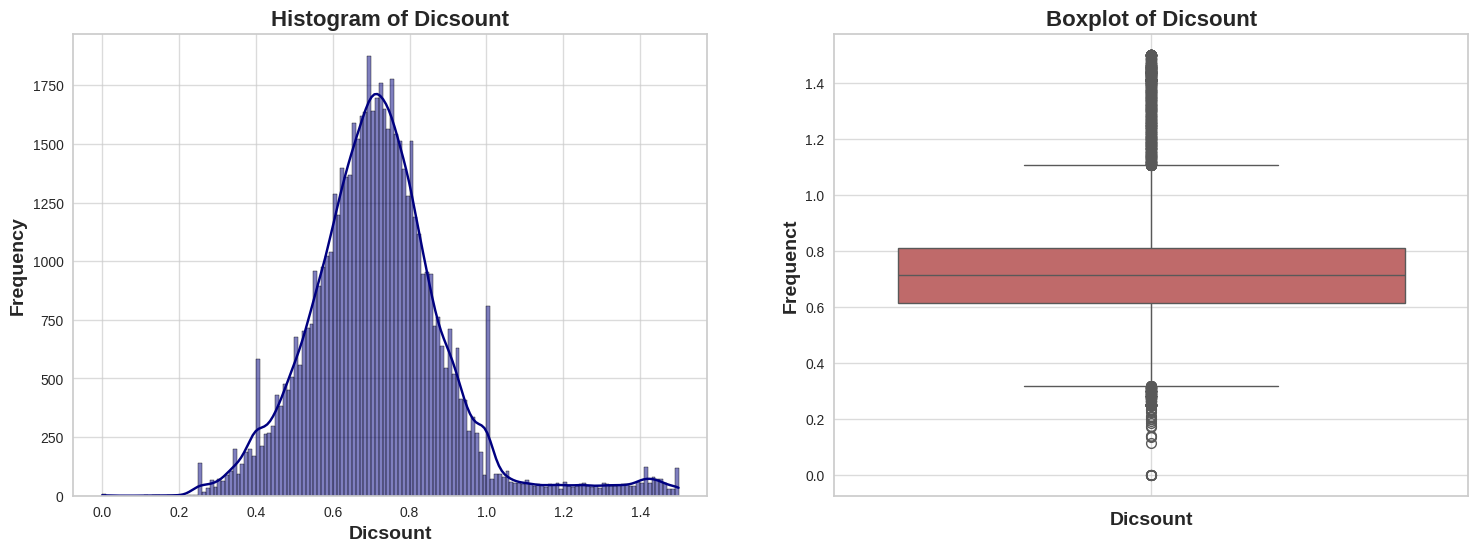

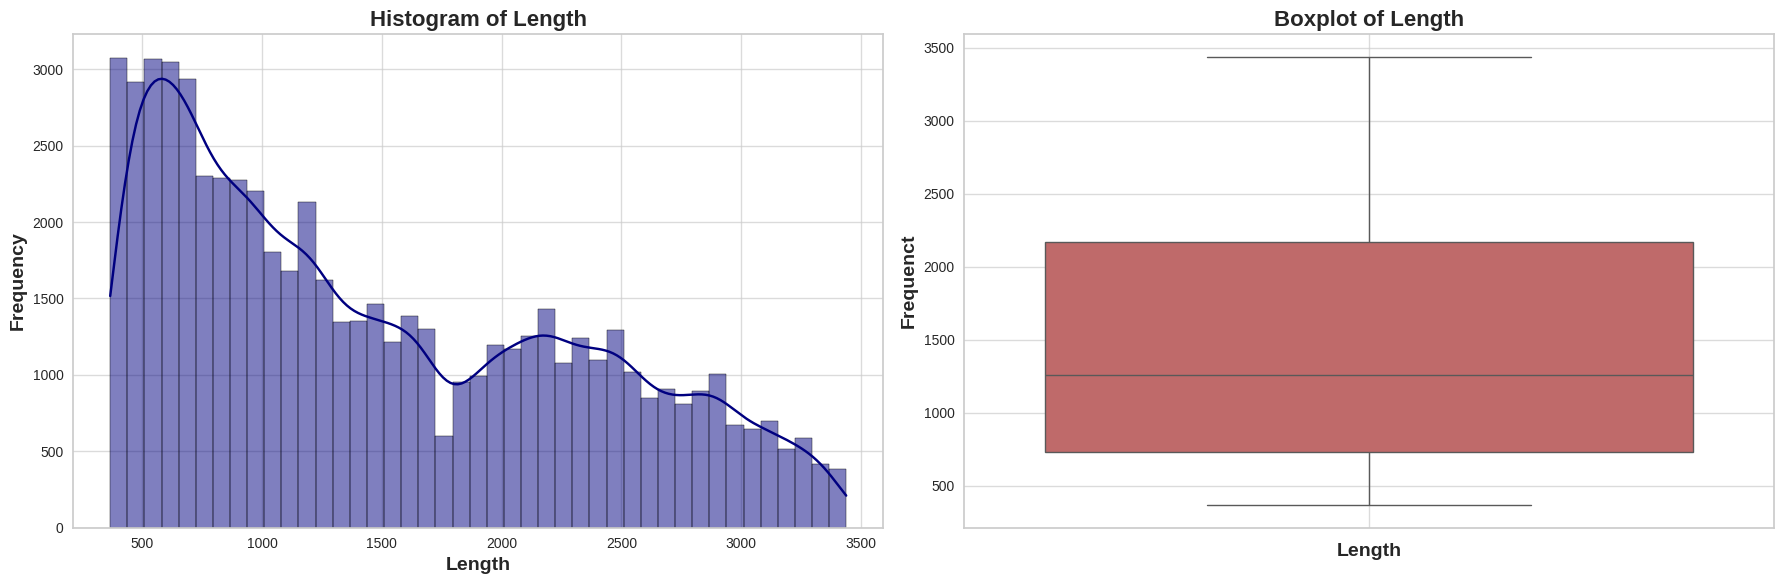

In [ ]:
# check distribution data
distribution_data(df_cluster)

In [ ]:
print(f'Number of rows before outlier handling: {len(df_cluster)}')

mask = pd.Series(True, index=df_cluster.index)

# drop outliers
for col in df_cluster.columns:
    Q1 = df_cluster[col].quantile(0.25)
    Q3 = df_cluster[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    mask &= (df_cluster[col] > low_limit) & (df_cluster[col] < high_limit)

df_cluster = df_cluster[mask].reset_index(drop=True)

print('Number of rows after outlier handling', len(df_cluster))

Number of rows before outlier handling: 61124
Number of rows after outlier handling 51501


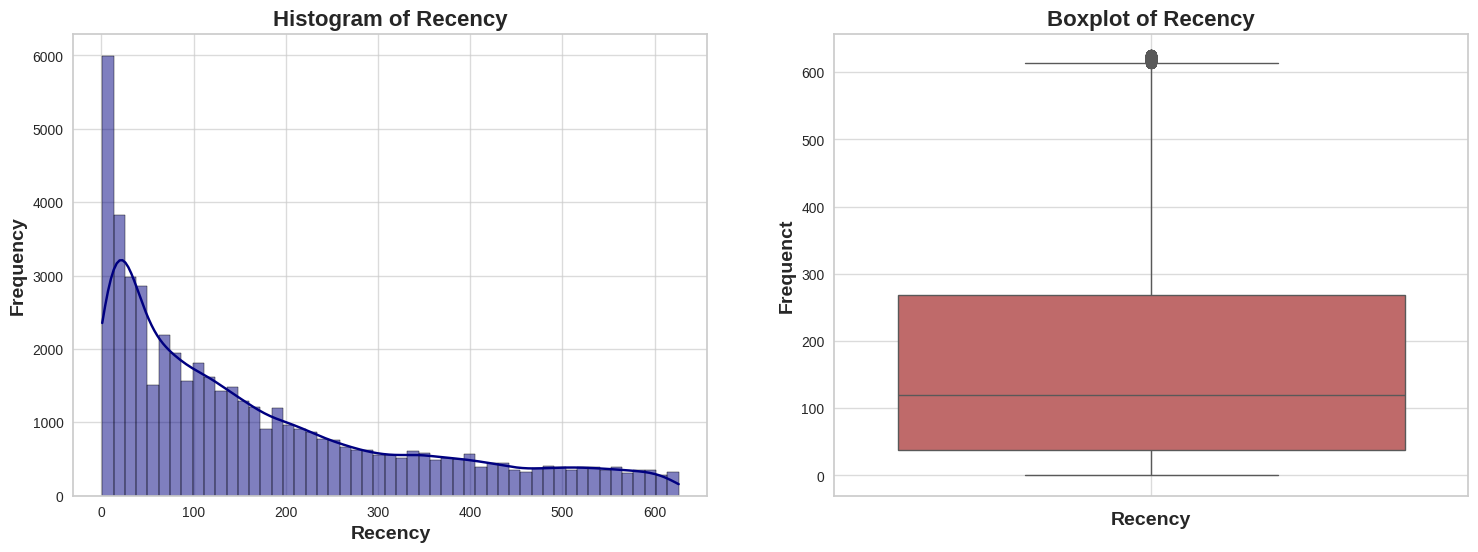

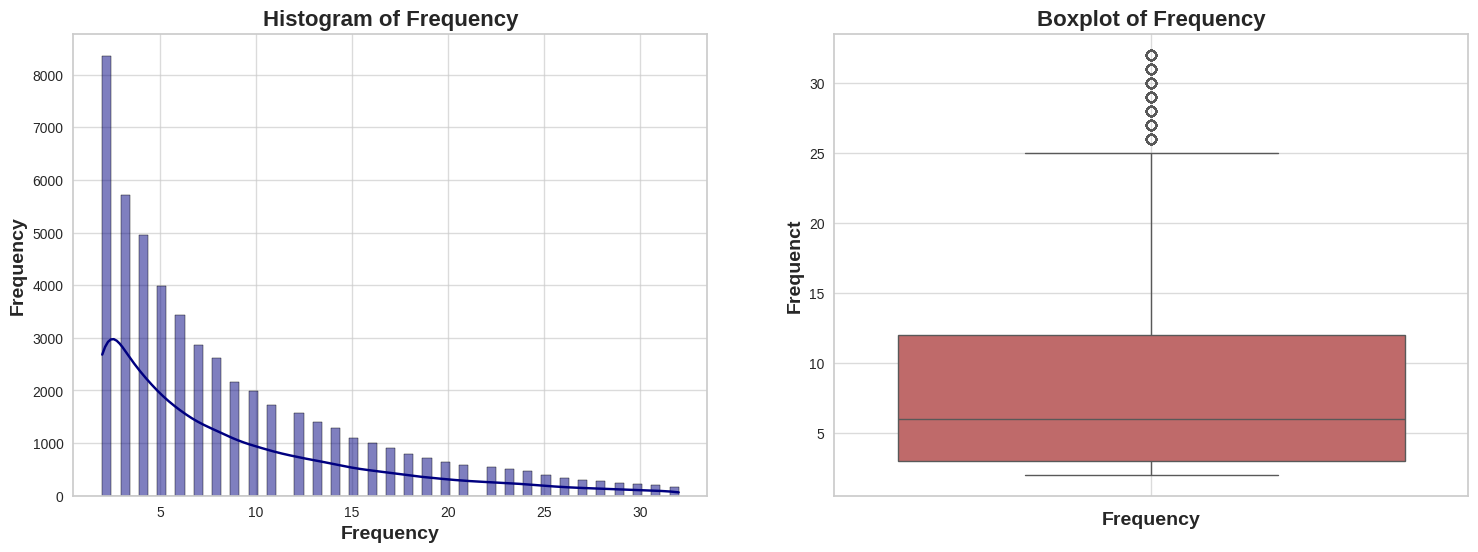

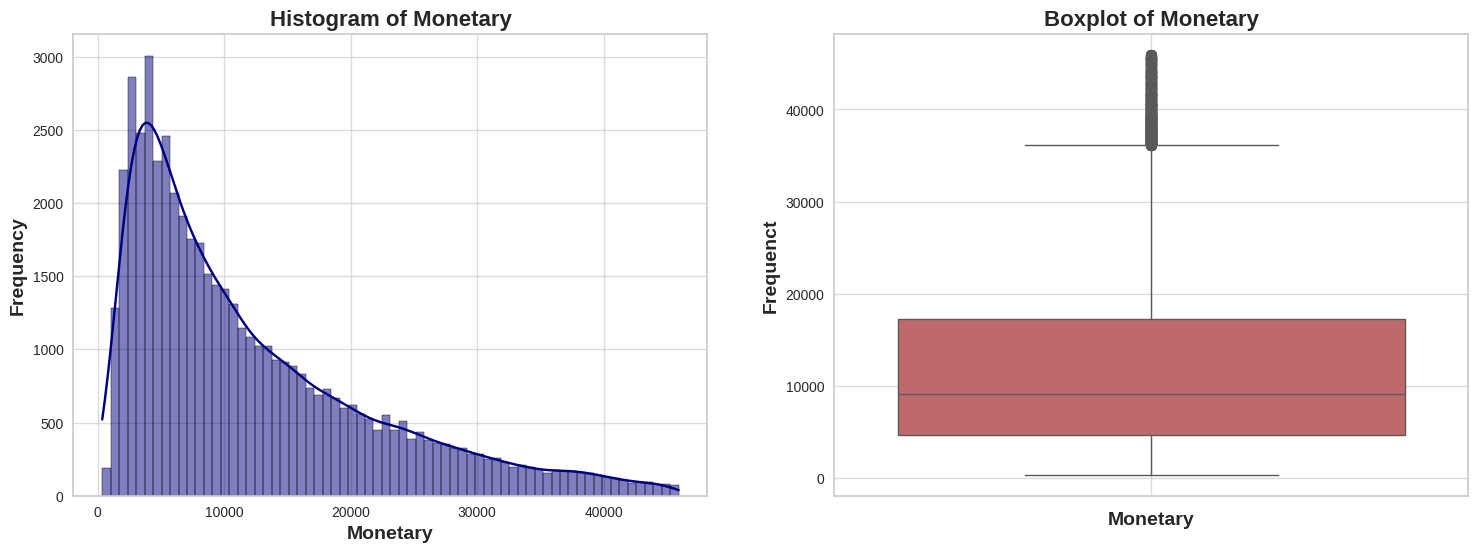

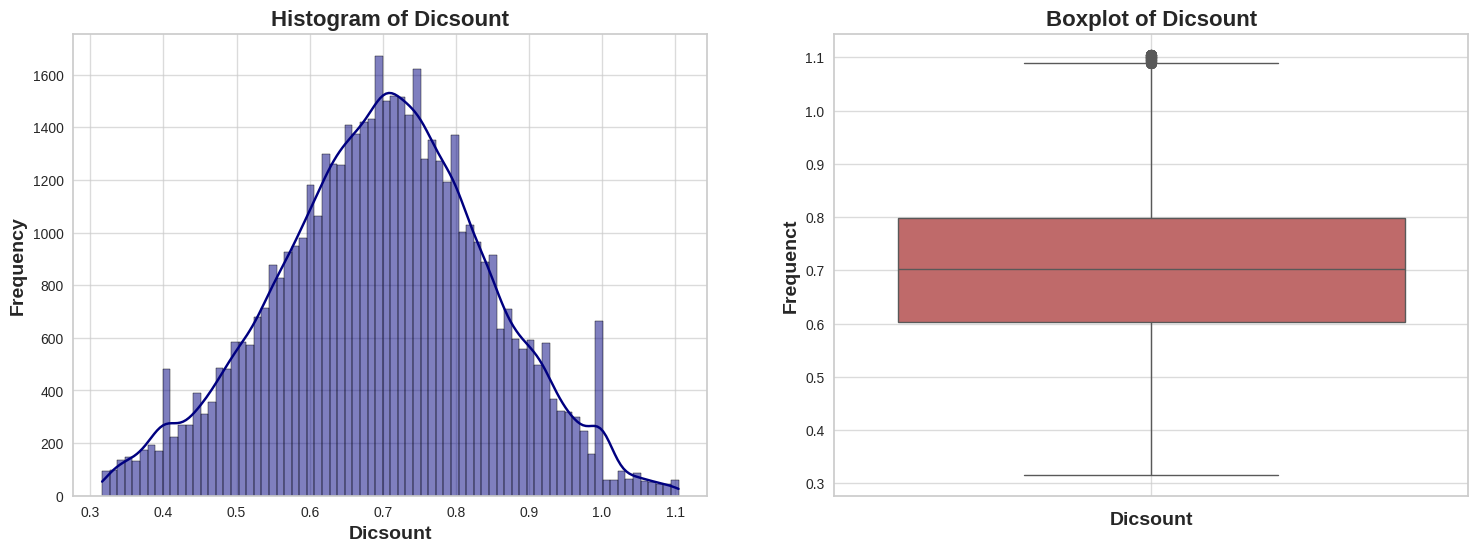

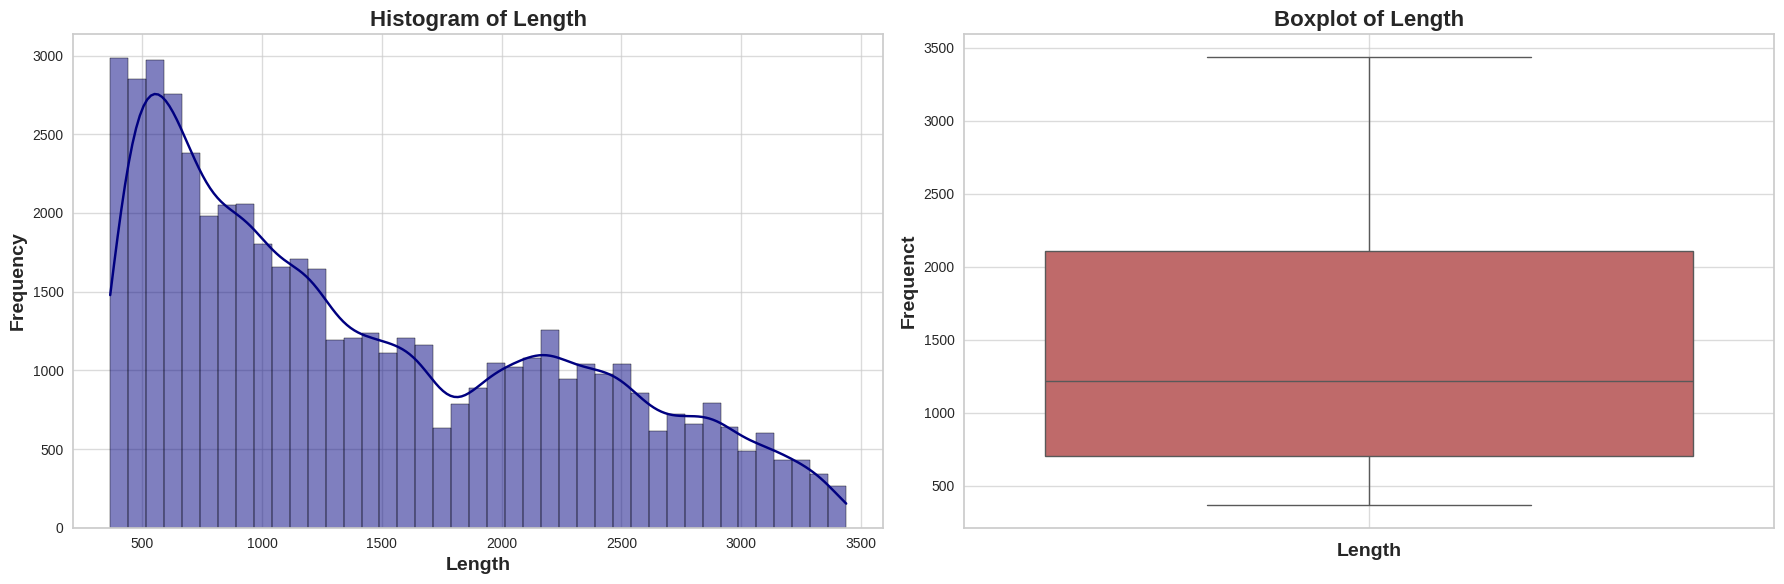

In [ ]:
# check distribution data after outlier handling
distribution_data(df_cluster)

**Observations :**
1. `Frequency` and `Monetary` : Even after removing rows with outliers, boxplots of each column show that there are still lots of outliers. Distribtions are right-skew. In this case, these outliers will be kept
2. `Length` : there are no outliers after outlier handling
3. `Recency` and `Discount` : there are some outliers above upper limit

## **Feature Standardization**

In [ ]:
# do standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_std = pd.DataFrame(df_scaled, columns=df_cluster.columns)

# **SEARCH OPTIMAL K VALUE**

## **Elbow Method**

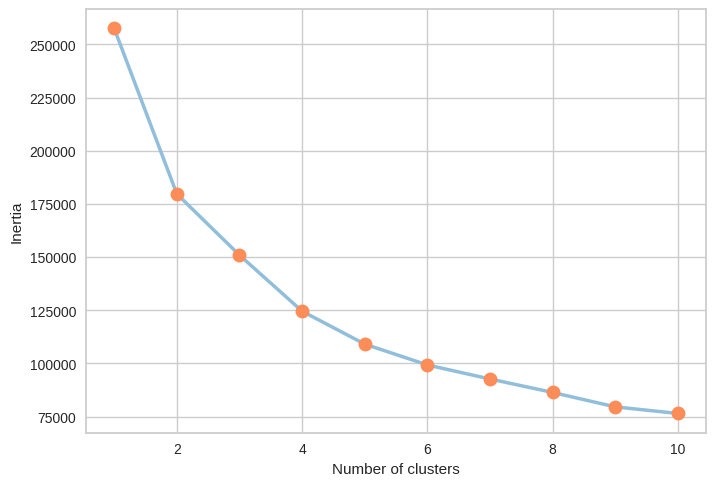

In [ ]:
# look for optimal K value with inertia
inertia = []
for k in range(1, 11) :
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

# visualization
plt.plot(range(1,11), inertia,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


**Observation :** If we look closely at the plot,  there is a drastic decrease in inertia up to K=4, after that the inertia tends to stable for K ≥ 4. The optimal k may be 3 - 4. For better visualization, I will try another library (KElbowVisualizer)

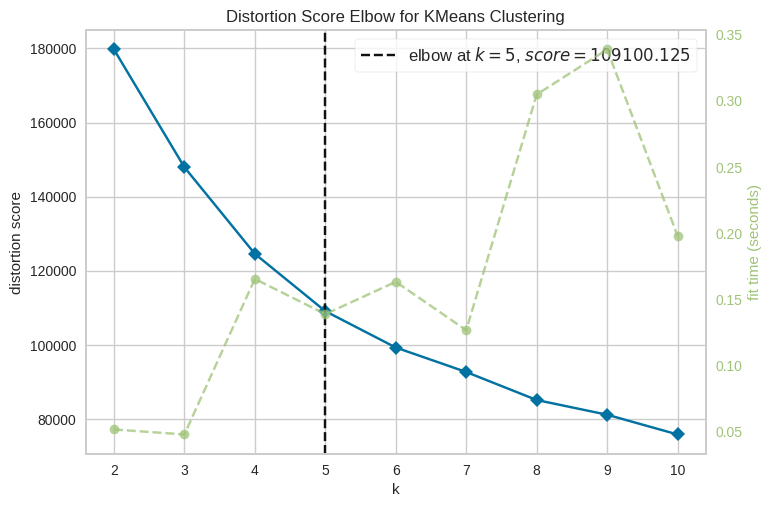

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# try another library for better visualization of best K
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

**Observation :** It can be seen that the optimal cluster is 5 if we use KElbowVisualizer. Silhoutte Score will then be used to compare the results of optimal number of clusters

## **Silhouette Score**

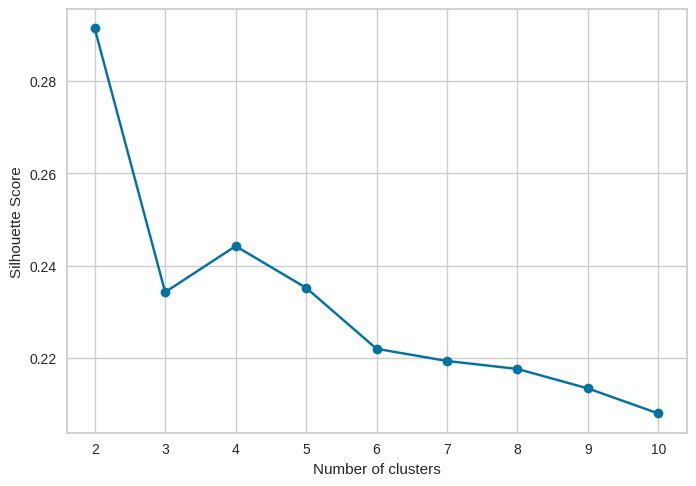

In [ ]:
# Silhouette score
ss = []

for k in range(2, 11) :
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(df_scaled)
  ss.append(silhouette_score(df_scaled, labels))

plt.plot(range(2, 11), ss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

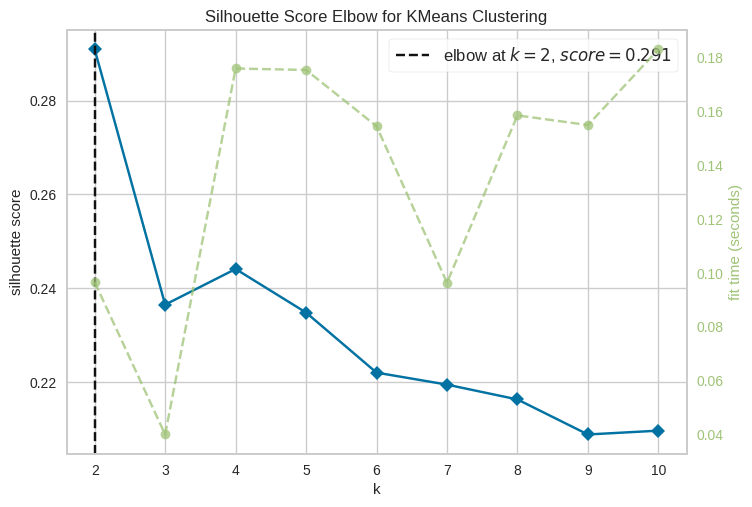

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# try another library
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_scaled)
visualizer.show()

**Observation :** Based on Silhoutte score, the optimal K values are 2 (score of 0.291), followed by 4 (around 0.245-0.25)

## **Choose the Optimal K**

Based on Silhoutte score, the optimal k values are 2 and 4 since these values have higher scores compared to other number of clusters. However, Elbow Method shows that the optimal k is 5. Thus, clustering will be simulated for k = 2, 4, 5 to compare the results and determine the best number of clusters

# **K-MEANS CLUSTERING**

## **Two Clusters**

In [ ]:
# Fit kmeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_std)

df_cluster.head()

Recency  Frequency  Monetary  Dicsount  Length  Cluster
0      114         24     35087  0.615947    2923        1
1       84          9     20660  0.522271    2916        1
2       30         12     23071  0.511084    2791        1
3       47          3      4608  0.646667    1293        0
4      535          2      3390  0.475000    1069        0

In [ ]:
df_cluster.groupby('Cluster').describe()

Recency                                                           \
           count        mean         std  min   25%    50%     75%    max   
Cluster                                                                     
0        35888.0  221.991836  173.441644  1.0  75.0  180.0  346.25  626.0   
1        15613.0   67.956767   75.907679  1.0  14.0   40.0   98.00  626.0   

        Frequency             ...  Dicsount             Length               \
            count       mean  ...       75%       max    count         mean   
Cluster                       ...                                             
0         35888.0   4.963135  ...  0.800000  1.104614  35888.0  1343.389880   
1         15613.0  17.097035  ...  0.787453  1.104798  15613.0  1646.128931   

                                                           
                std    min    25%     50%     75%     max  
Cluster                                                    
0        803.087368  366.0  648.0  1114.0  1970.0  3438.0  
1        856.792468  366.0  881.0  1515.0  2363.0  3438.0  

[2 rows x 40 columns]

### **Boxplot Visualization**

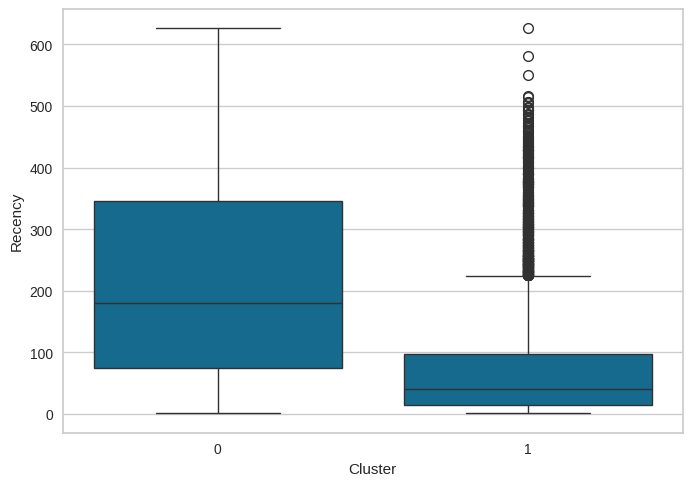

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=df_cluster)
plt.show()

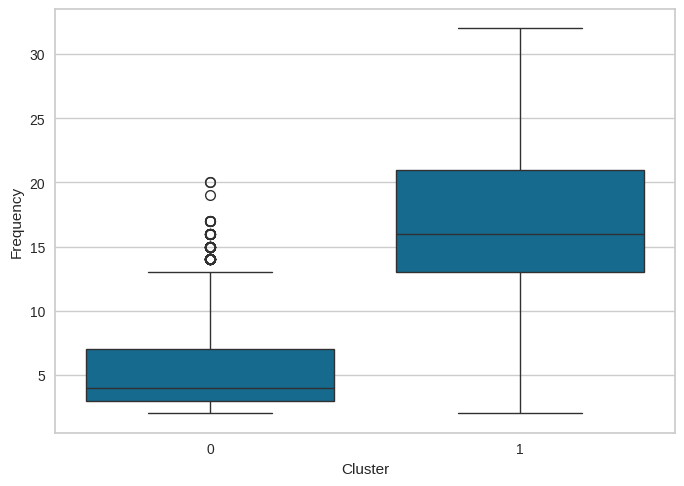

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=df_cluster)
plt.show()

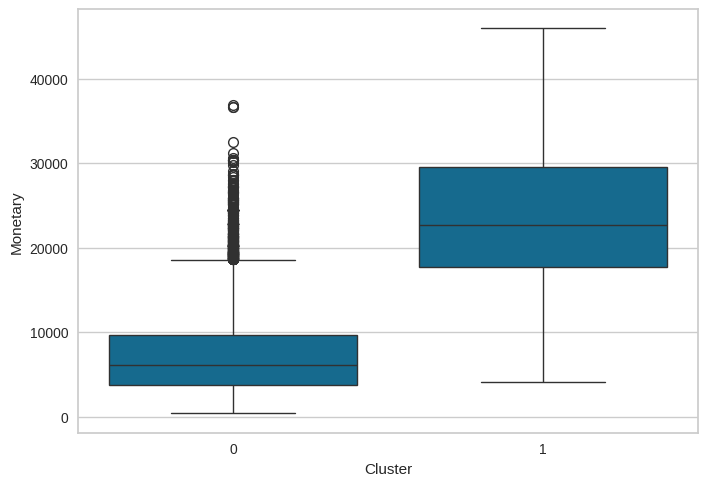

In [ ]:
sns.boxplot(x='Cluster', y='Monetary', data=df_cluster)
plt.show()

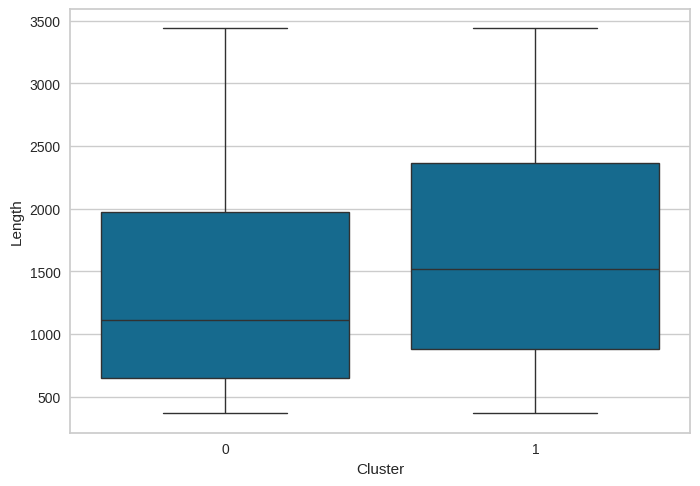

In [ ]:
sns.boxplot(x='Cluster', y='Length', data=df_cluster)
plt.show()

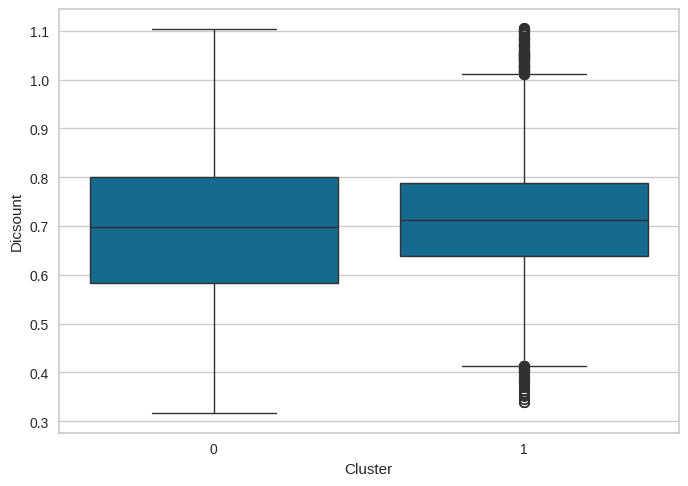

In [ ]:
sns.boxplot(x='Cluster', y='Dicsount', data=df_cluster)
plt.show()

**Insights :**
1. **Cluster 0 :** passengers generally have lower frequency and monetary and have not not used flights for long period
2. **Cluster 1** : passengers generally have higher frequency and monetary; have used flights recently; show a higher median of join duration. This indicates that they are likely loyal and actively engaged passengers.




### **2D-Visualization**

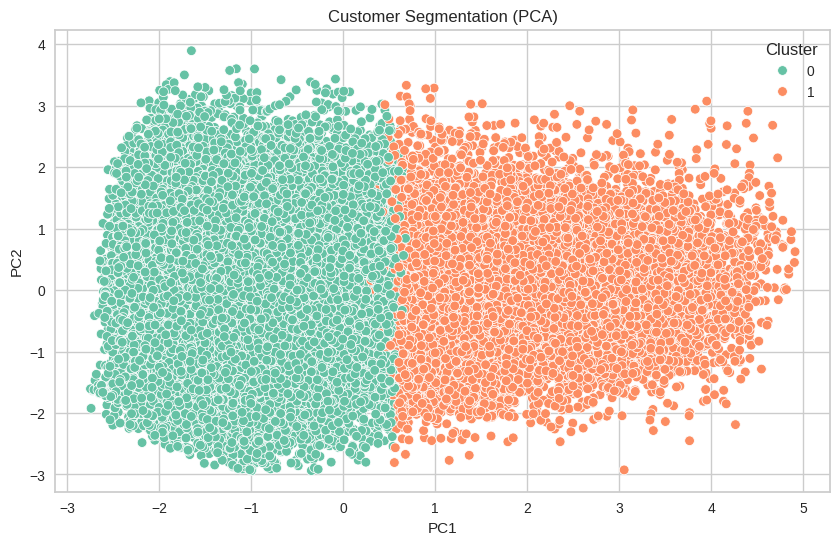

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

df_cluster['PC1'] = components[:, 0]
df_cluster['PC2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (PCA)')
plt.show()

**Insights :** It can be seen from the segmentation using 2 clusters that Cluster 0 and Cluster 1 still overlap, but the clusters are already fairly well separated.

## **Four Clusters**

In [ ]:
# Fit kmeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_std)

df_cluster.head()

Recency  Frequency  Monetary  Dicsount  Length  Cluster       PC1       PC2
0      114         24     35087  0.615947    2923        1  3.265831  0.111209
1       84          9     20660  0.522271    2916        2  1.044995 -0.400365
2       30         12     23071  0.511084    2791        2  1.582645 -0.615695
3       47          3      4608  0.646667    1293        3 -0.694650 -0.501386
4      535          2      3390  0.475000    1069        0 -2.284388 -1.034605

In [ ]:
df_cluster.groupby('Cluster').describe()

Recency                                                             \
           count        mean         std    min    25%    50%    75%    max   
Cluster                                                                       
0        10847.0  440.881165  103.395801  189.0  357.0  436.0  529.0  626.0   
1        10561.0   64.752675   75.684759    1.0   13.0   36.0   90.0  581.0   
2        11614.0  131.644739  106.345396    1.0   41.0  110.0  197.0  560.0   
3        18479.0  110.008063   82.191226    1.0   37.0   97.0  171.0  379.0   

        Frequency             ...       PC1                PC2            \
            count       mean  ...       75%       max    count      mean   
Cluster                       ...                                          
0         10847.0   3.786208  ... -1.311347  0.568529  10847.0  0.314987   
1         10561.0  19.623520  ...  2.911029  4.910618  10561.0 -0.009492   
2         11614.0   6.616670  ...  0.515770  2.082654  11614.0  0.559028   
3         18479.0   6.488122  ...  0.172162  1.292727  18479.0 -0.530818   

                                                                     
              std       min       25%       50%       75%       max  
Cluster                                                              
0        1.084002 -2.506833 -0.452056  0.341694  1.069528  3.895865  
1        0.823221 -2.925561 -0.565874 -0.037789  0.524758  3.075805  
2        0.899369 -2.157146 -0.059405  0.557312  1.168816  3.599415  
3        0.867467 -2.938992 -1.125282 -0.504645  0.064633  2.241244  

[4 rows x 56 columns]

### **Boxplot Visualization**

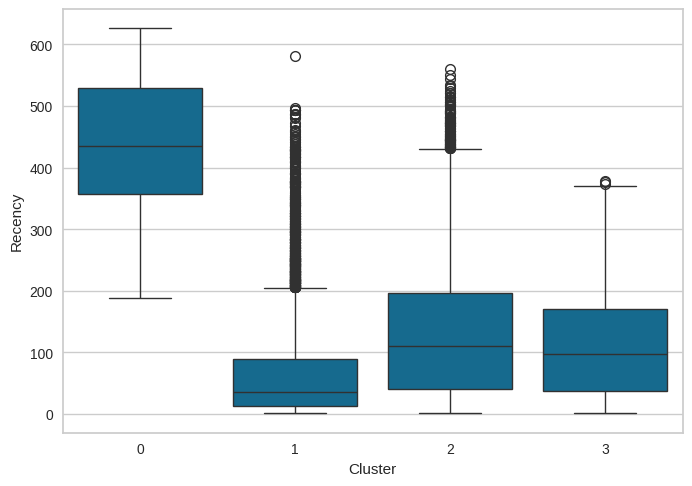

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=df_cluster)
plt.show()

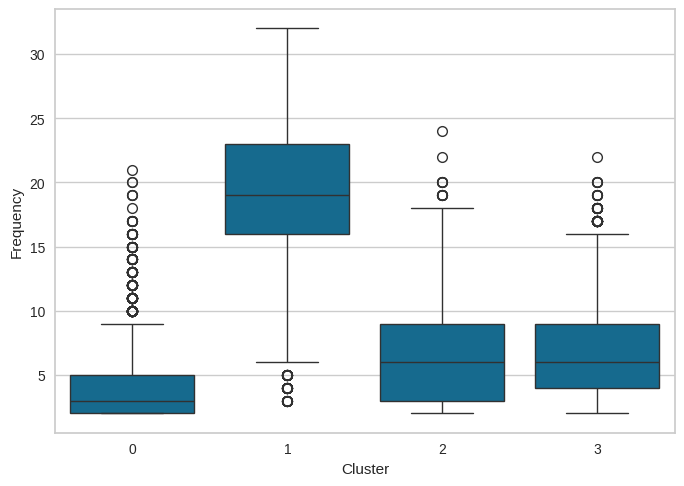

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=df_cluster)
plt.show()

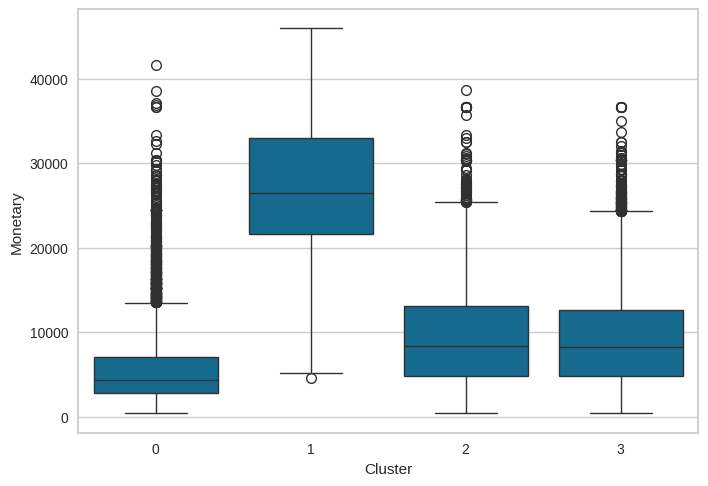

In [ ]:
sns.boxplot(x='Cluster', y='Monetary', data=df_cluster)
plt.show()

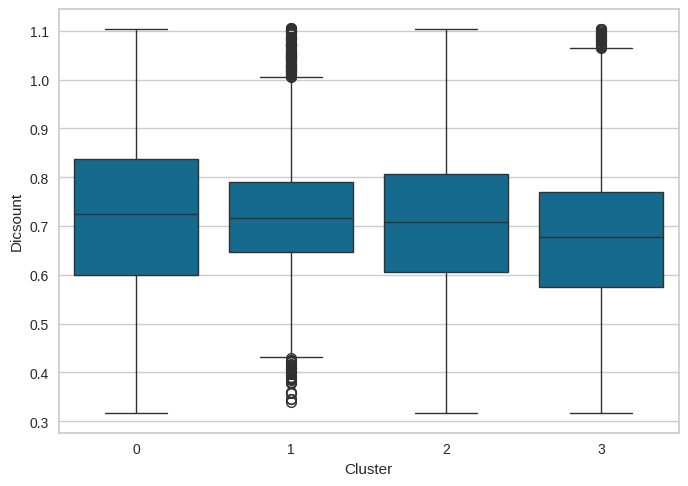

In [ ]:
sns.boxplot(x='Cluster', y='Dicsount', data=df_cluster)
plt.show()

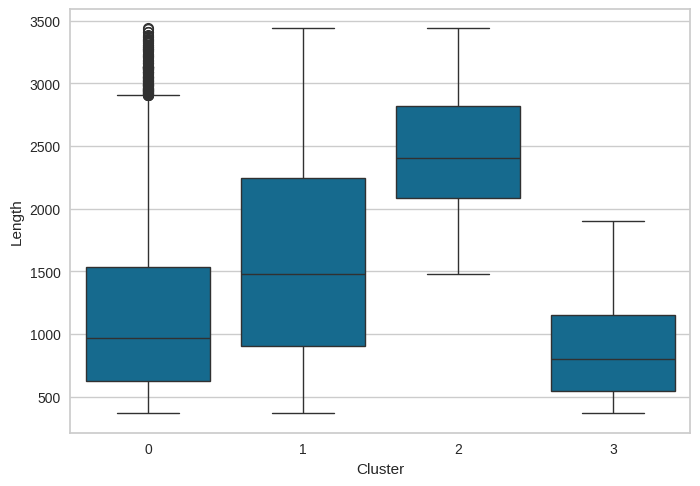

In [ ]:
sns.boxplot(x='Cluster', y='Length', data=df_cluster)
plt.show()

**Inisghts :**
1. **Cluster 0** : Passengers in this cluster have just joined the program, resulting in low frequency and monetary values. Interestingly, despite their recent enrollment, they have not used flights for a long period (436 days), indicating possible inactivity or low initial engagement.
2. **Cluster 1** : Passengers have the highest frequency and monetary; have used flights more recently; ranked second for the longest duration of membership. **This indicates a highly engaged and champion passengers segment.**
3. **Cluster 2** : Despite being the oldest member among all the clusters, passengers in this cluster have low frequency and monetary. However, these passengers have used flights recently. This indicates that these passengers rarely travel by flight for long distances
4. **Cluster 3** : Cluster 3 have similar values of Recency, Monetary, and Frequency as those in cluster 2, but passengers in this cluster have just joined the program

### **2D-Visualization**

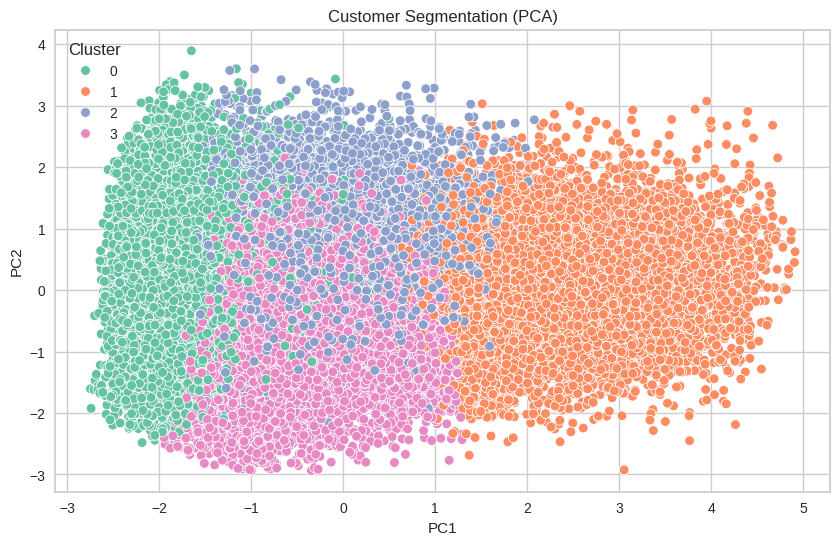

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

df_cluster['PC1'] = components[:, 0]
df_cluster['PC2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (PCA)')
plt.show()

**Insights :** It can be seen from the segmentation using 4 clusters that all the clusters still overlap, especially cluster 2 with other clusters. Meanwhile, other clusters are fairly well cluastered

## **Five Clusters**

In [ ]:
# Fit kmeans clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_std)

df_cluster.head()

Recency  Frequency  Monetary  Dicsount  Length  Cluster       PC1       PC2
0      114         24     35087  0.615947    2923        1  3.265831  0.111209
1       84          9     20660  0.522271    2916        2  1.044995 -0.400365
2       30         12     23071  0.511084    2791        2  1.582645 -0.615695
3       47          3      4608  0.646667    1293        3 -0.694650 -0.501386
4      535          2      3390  0.475000    1069        4 -2.284388 -1.034605

In [ ]:
df_cluster.groupby('Cluster').describe()

Recency                                                             \
           count        mean         std    min    25%    50%    75%    max   
Cluster                                                                       
0         9559.0  194.055654  141.863766    1.0   76.0  168.0  292.0  626.0   
1         9970.0   63.184754   74.582018    1.0   12.0   35.0   88.0  581.0   
2        10257.0  125.833870  104.160564    1.0   37.0  104.0  189.0  561.0   
3        13351.0  105.258557   81.928395    1.0   34.0   88.0  165.0  390.0   
4         8364.0  459.939861   99.039682  218.0  380.0  466.0  544.0  626.0   

        Frequency             ...       PC1                PC2            \
            count       mean  ...       75%       max    count      mean   
Cluster                       ...                                          
0          9559.0   4.686160  ... -0.438676  1.369839   9559.0 -1.288682   
1          9970.0  19.922768  ...  2.964468  4.910618   9970.0 -0.058320   
2         10257.0   6.982256  ...  0.621461  2.266262  10257.0  0.621338   
3         13351.0   7.334432  ...  0.393682  1.588191  13351.0  0.047234   
4          8364.0   3.836561  ... -1.311733  0.745831   8364.0  0.704961   

                                                                     
              std       min       25%       50%       75%       max  
Cluster                                                              
0        0.553126 -2.938992 -1.657106 -1.261416 -0.879145  0.121122  
1        0.823099 -2.925561 -0.622568 -0.091867  0.476751  3.075805  
2        0.809222 -1.561449  0.024238  0.575077  1.163353  3.389782  
3        0.681803 -1.751681 -0.441310 -0.021913  0.492371  2.811313  
4        0.878739 -1.403019  0.044844  0.634375  1.316328  3.895865  

[5 rows x 56 columns]

### **Boxplot Visualization**

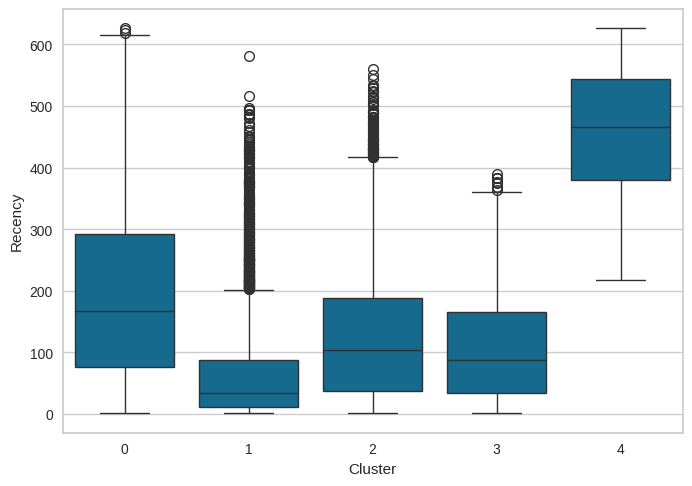

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=df_cluster)
plt.show()

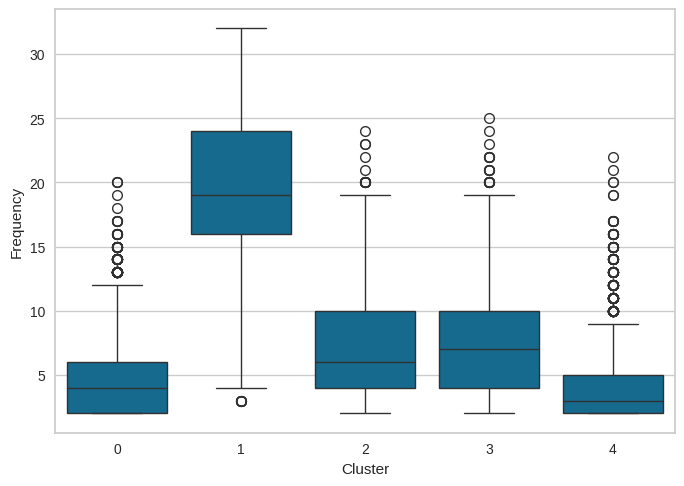

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=df_cluster)
plt.show()

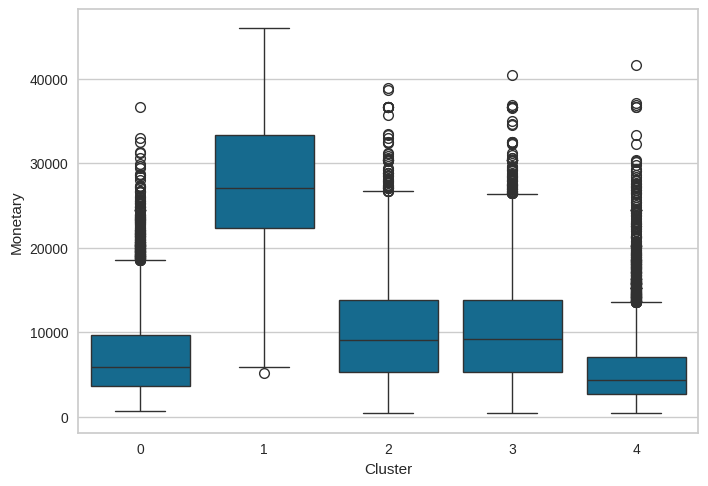

In [ ]:
sns.boxplot(x='Cluster', y='Monetary', data=df_cluster)
plt.show()

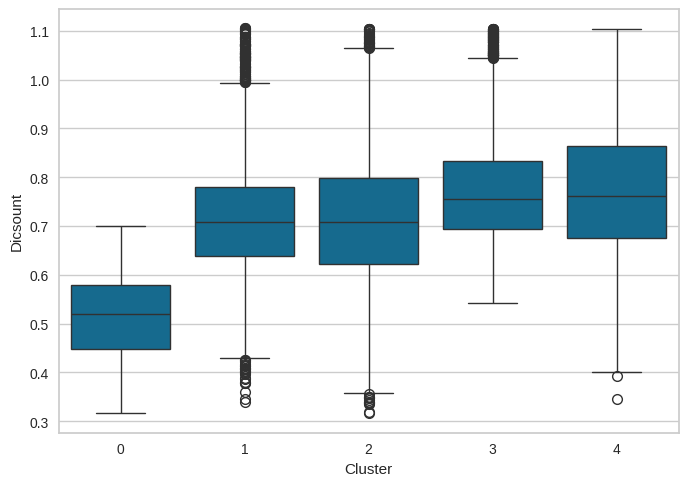

In [ ]:
sns.boxplot(x='Cluster', y='Dicsount', data=df_cluster)
plt.show()

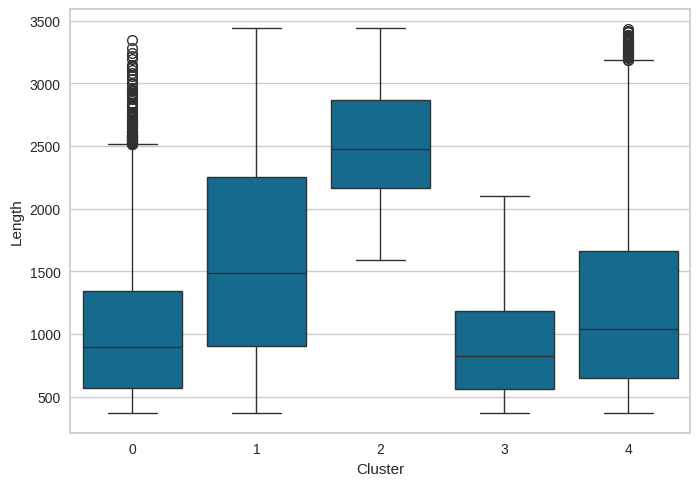

In [ ]:
sns.boxplot(x='Cluster', y='Length', data=df_cluster)
plt.show()

**Insights :**
1. **Cluster 0** : Cluster 0 has joined program membership, resulting in low value of Frequency and Monetary. Interestingly, despite their recent enrollment, they have not used flights for a long period (168 days), indicating possible inactivity or low initial engagement. This behaviour can be influenced by the lowest discount for this cluster
2. **Cluster 1** : Passengers have the highest frequency and monetary; have used flights more recently; ranked second for the longest duration of membership. This indicates a highly engaged and champion passengers segment.
3. **Cluster 2** : Despite being the oldest member and getting quite high discount, passengers in this cluster have low values of Frequency and Monetary
4. **Cluster 3** : Passengers in this cluster have just recently joined the membership program and traveled by plane. However, this cluster has low Frequency and Monetary, indicating that this cluster is potential to be loyal if the company pays attention to them
5. **Cluster 4** : Cluster 4 has the lowest Frequency and Monetary values among all the clusters and also records the longest time since last flight usage, indicating very low engagement and potential churn.




### **2D-Visualization**

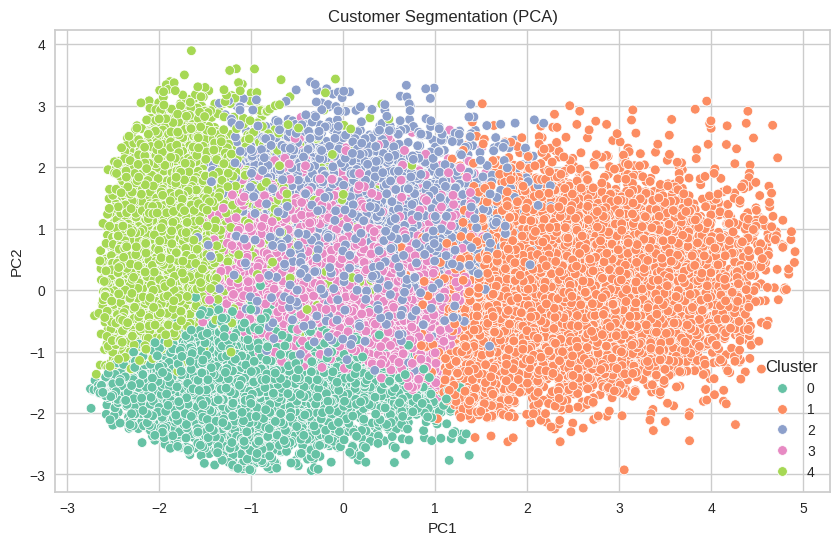

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

df_cluster['PC1'] = components[:, 0]
df_cluster['PC2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (PCA)')
plt.show()

**Insights :** It can be seen from the segmentation using 5 clusters that all the clusters still overlap, but the clusters are already fairly well separated.

## **Clustering Evaluation**

Based on the visualization and the distribution data of each feature for all the clusters, **k=4 will be chosen.** This choice was made because, in the case of k = 5, some clusters exhibited similar characteristics, indicating redundancy. On the other hand, clustering based on k = 2 is too coarse for meaningful customer segmentation despite showing good separation.  Additionally, k = 4 offers a good trade-off between a high Silhouette score and low inertia

# **INSIGHTS AND BUSINESS RECOMMENDATIONS**

## **Insights**

* **Cluster 0 (Lost - New Joiners)**  

Passengers in this cluster recently joined the program, but have not used flights for a long time (436 days); low frequency and monetary; indicates low initial engagement or potential early churn.


* **Cluster 1 (The Champions)**

Although this cluster ranked second for membership duration, passengers have the highest frequency and monetary as well as have used flights more recently.

* **Cluster 2 (Need Attention)**

Longest membership duration; low frequency and monetary; have used flights recently; likely infrequent travelers or those who only fly occasionally.


* **Cluster 3 (Recent Passengers - Potential Loyalist)**  

Passengers in this clustes just joined the program more recently, thus, these passengers still have low values of frequency and monetary. However, since their overall behavioral patterns are similar to those in Cluster 2—who have been members for the longest time—this suggests that this passenger can be considered as potential loyalist




## **Business Recommendations**

* **Cluster 0 (Lost New Joiners)**

  1. Conduct survey to find out the reasons why they haven't flown since joining and adjust strategies based on feedbacks
  2. Give reactivation campaigns by sending re-engagement emails or app notifications
  3. Offer discount for flight

* **Cluster 1 (The Champions)**

  1. Offer special rewards for being the most royal and loyal passengers
  2. Ensure the service quality
  3. Give referral incentives to encourage them to invite people using the airline company

* **Cluster 2 (Need Attention)**

  1. Offer targeted promotions such as discounts on specific routes or seasonal deals to encourage more frequent travel
  2. Provide tailored suggestions such as destination recommendations based on past trips

* **Cluster 3 (Recent Passengers - Potential Loyalist)**

  1. Reward them for first few flights, so they will have good impression on the company
  2. Give reward points after each booking that can be reedemed
  3. Maintain their engagement with the company by sending personalized reminders and flight suggestions

# **IMPROVEMENT**

Since this project experimented on using LRMFC model which is a modified RFM model, future experiments could try applying the traditional RFM model instead. With fewer features, the RFM model might result in better cluster separation and simpler interpretation.